# Máquinas de vectores de soporte

````{admonition} Introducción
- Las ***máquinas de vectores de soporte (SVM)*** propuestas por ***Vapnik (1996, 1998)***, se caracterizan por ser un proceso interno de ***construcción de reglas de clasificación, bastante diferente al de las de los métodos estadísticos***. Las ***SVM*** suelen ser eficaces en casos en los que los métodos de clasificación tradicionales no lo son, como por ejemplo, los ***problemas basados en datos con estructura no lineal***, además las ***SVM*** se han adaptado y aplicado en muchos campos de investigación. En esta sección, nos centramos en las ***SVM*** para la solución de ***problemas de regresión y clasificación***, así como también el proceso de construcción, luego abordaremos los pasos de su extensión, de sistemas lineales a sistemas no lineales.
- El paradigma algorítmico de las ***SVM*** aborda el reto de la complejidad de la muestra mediante la **búsqueda de separadores de "mayor margen"**. A grandes rasgos, un semiespacio separa un conjunto de entrenamiento con un gran margen si ***todos los ejemplos no sólo están en el lado correcto del hiperplano de separación, sino también lejos de él***. Restringir el algoritmo a la salida de un separador de gran margen puede producir una complejidad de muestra pequeña, incluso si la dimensionalidad del espacio de características es alta (e incluso infinita). Introduciremos el concepto de margen y lo relacionamos con el ***paradigma de minimización de pérdidas regularizadas***.
````

## Análisis

## Espacios de Hilbert con Kernel reproductor

Sea $H$ un ***espacio lineal de funciones reales*** definidas sobre $\mathcal{X}\subseteq\mathcal{R}^{l}$. Además, suponga que $H$ es un ***espacio de Hilbert***, con producto interno $\langle\cdot,\cdot\rangle_{H}$ que induce la norma $\|\cdot\|_{H}$, con respecto a la cual $H$ es completo.

````{prf:definition}
:label: def_hilbert_rep

Un espacio de Hilbert $H$ es llamado `espacio de Hilbert con kernel reproductor (RKHS)` si existe una función:

$$
\kappa:\mathcal{X}\times\mathcal{X}\mapsto\mathbb{R}
$$

con las siguientes propiedades:

- Para cada $\boldsymbol{x}\in\mathcal{X},~\kappa(\cdot, \boldsymbol{x})$ pertenece a $H$
- $\kappa(\cdot, \cdot)$ tiene la llamada `propiedad de reproducción`, esto es:

$$
f(\boldsymbol{x})=\langle f, \kappa(\cdot, \boldsymbol{x})\rangle,\quad\forall f\in H,~\forall \boldsymbol{x}\in\mathcal{X}
$$ (prop_reproductora)

````

- Una consecuencia directa de la ***propiedad reproductora*** es, si definimos $f(\cdot)=\kappa(\cdot, \boldsymbol{y}),~\boldsymbol{y}\in\mathcal{X}$ entonces

$$
\kappa(\boldsymbol{x}, \boldsymbol{y})=\langle\kappa(\cdot, \boldsymbol{y}), \kappa(\cdot, \boldsymbol{x})\rangle=\langle\kappa(\cdot, \boldsymbol{x}), \kappa(\cdot, \boldsymbol{y})\rangle=\kappa(\boldsymbol{y}, \boldsymbol{x})
$$

````{prf:definition}
:label: def_features_map

Sea $H$ un `(RKHS)` asociado con una función kernel $\kappa(\cdot, \cdot)$ y $\mathcal{X}$ un conjunto de elementos. Entonces el mapeo

$$
\mathcal{X}\ni\boldsymbol{x}\mapsto\Phi(\boldsymbol{x}):=\kappa(\cdot, \boldsymbol{x})\in H
$$

es conocido como `mapeo de características` y el espacio $H$ es el `espacio de características`. Esto es $\Phi$ mapea cada vector $\boldsymbol{x}\in\mathcal{X}$ en el (RKHS) $H$.
````

- $H$ puede ser de `dimensión finita o inifinita y sus elementos pueden ser funciones`. Esto es, cada `punto de entrenamiento es mapeado en un espacio de funciones`. Si $H$ es de dimensión finita, por ejemplo el Espacio Euclidiano $\mathbb{R}^{k},~\Phi(\boldsymbol{x})\in\mathbb{R}^{k}$.

- Consideraremos el caso de dimensión infinita cuyas imágenes son funciones de $\Phi(\cdot)$. Veamos las ventajas de este `mapeo, del espacio original a otro de dimensión infinita (RKHS)`.

````{prf:definition}
:label: def_kernel_trick

Sean $\boldsymbol{x}, \boldsymbol{y}\in\mathcal{X}\subseteq\mathbb{R}^{l}$, entonces el `producto interno del respectivo mapeo de imágenes` es escrito como:

$$
\langle\Phi(\boldsymbol{x}), \Phi(\boldsymbol{y})\rangle_{H}=\langle \kappa(\cdot, \boldsymbol{x}), \kappa(\cdot, \boldsymbol{y})\rangle
$$

o

$$
\langle\Phi(\boldsymbol{x}), \Phi(\boldsymbol{y})\rangle_{H}=\kappa(\boldsymbol{x}, \boldsymbol{y}),\quad\text{Kernel trick}
$$

````

```{figure} ./imgs/kernel_map_ilust.png
:name: fig_kernel_map_ilust
:align: center
:scale: 70
```

- Empleando este tipo de mapeo a nuestro problema, calculamos `operaciones de producto interno en` $H$ en una manera eficiente, vía `evaluación de funciones sobre el espacio de baja dimensión`. 

````{figure} ./imgs/non-linear-classifier-using-kernel-trick.png
:name: non-linear-classifier-using-kernel-trick_fig
:align: center

Ilustración de la propiedad **kernel trick**. Fuente {cite}`hachimi2020multi`.
````

````{prf:property}
:label: props_features_map

El mapeo $\Phi(\cdot)$ satisface las siguientes propiedades

- `Mapea implícitamente inputs (datos de entrenamiento) en un espacio RKHS`
- Soluciona tareas de `estimación lineal en` $H$, involucrando las imágenes: 

$$
\Phi(x_{n}),~n=1,2,\dots,N.
$$

- **Proyecta el algoritmo que soluciona problemas de parámetros desconocidos, en términos del producto interno** en la forma:

$$
\langle\Phi(x_{i}), \Phi(x_{j})\rangle,\quad i,j=1,2,\dots,N
$$

- Considera la `evaluación kernel como el producto interno`:

$$
\langle\Phi(x_{i}),\Phi(x_{j})\rangle=\kappa(x_{i}, x_{j}).
$$
````

- Nótese que este procedimiento de mapeo explicito es necesario para calcular la operación kernel en el último paso. La forma especifica de $\kappa(\cdot,\cdot)$ no concierne en el análisis.

````{prf:example}
:label: ej_feature_map

Considere el caso del `espacio de 2 dimensiones` y el mapeo

$$
\mathbb{R}^{2}\ni \boldsymbol{x}\mapsto\Phi(x)=(x_{1}^{2}, \sqrt{2}x_{1}x_{2}, x_{2}^{2})\in\mathbb{R}^{3}
$$

Entonces, dados los vectores $\boldsymbol{x}=(x_{1}, x_{2})^{T}$ y $\boldsymbol{y}=(y_{1}, y_{2})^{T}$, es facil ver que

$$
\kappa(\boldsymbol{x}, \boldsymbol{y})=\langle\Phi(\boldsymbol{x}), \Phi(\boldsymbol{y})\rangle_{\mathbb{R}^{3}}=\Phi(\boldsymbol{x})^{T}\Phi(\boldsymbol{y})=(x_{1}y_{1}+x_{2}y_{2})^{2}=(\boldsymbol{x}^{T}\boldsymbol{y})^{2}
$$

Es decir, el producto interior en el espacio tridimensional, después del mapeo, está dado en términos de una `función de las variables en el espacio original`.
````

````{prf:property}
:label: prop_kcompacto

Sea $\mathcal{X}$ un conjunto de puntos. Típicamente, $\mathcal{X}\subseteq\mathbb{R}^{l}$ es **compacto, esto es, cada sucesión en** $X$ **tiene una subsucesión convergente**. Sea $\kappa$ la función

$$
\kappa:\mathcal{X}\times\mathcal{X}\mapsto\mathbb{R}.
$$

La función $\kappa$ es llamada `kernel definido positivo si satisface`

$$
\sum_{n=1}^{N}\sum_{m=1}^{N}a_{n}a_{m}\kappa(x_{n}, x_{m})\geq0,
$$

para cualquier número real $a_{n}, a_{m}$ y cualquier punto $x_{n}, x_{m}\in\mathcal{X}$ y cualquier $N\in\mathbb{N}$. O equivalentemente, si definimos la matriz $K$, de orden $N$

$$
K=
\begin{pmatrix}
k(x_{1}, x_{1}) & \cdots & k(x_{1}, x_{N})\\
\vdots & \vdots & \vdots\\
k(x_{N}, x_{1}) & \cdots & k(x_{N}, x_{N})\\
\end{pmatrix}
$$

$a^{T}Ka\geq0$, donde $a=(a_{1}, a_{2},\dots, a_{N})^{T}$.
````

````{prf:example}
:label: ej_kernel_functions

Los siguientes son algunos `ejemplos típicos de funciones kernel`, las cuales son comúnmente usadas en varias aplicaciones. Estas funciones kernel son utilizadas en `Python` para los modelos `SVC` y `SVR` (ver [kernel-functions](https://scikit-learn.org/stable/modules/svm.html#kernel-functions)). 

- El `kernel gaussiano` está entre las más populares y está dado por la función

    $$
    \kappa(\boldsymbol{x}, \boldsymbol{y})=\exp\left(-\frac{\|\boldsymbol{x}-\boldsymbol{y}\|^{2}}{2\sigma^2}\right),\quad\sigma>0
    $$

- El `kernel polinomial` homogéneo tiene la forma

    $$
    \kappa(\boldsymbol{x}, \boldsymbol{y})=(\boldsymbol{x}^{T}\boldsymbol{y})^{r},
    $$
    
    donde $r$ es un parámetro.

- El `kernel polinómico no-homogéneo` tiene la forma

    $$
    \kappa(\boldsymbol{x}, \boldsymbol{y})=(\boldsymbol{x}^{T}\boldsymbol{y}+c)^{r},
    $$
    
    donde $c\geq0,~r$ son parámetros.

- El `kernel laplaciano` está dado por

    $$
    \kappa(\boldsymbol{x}, \boldsymbol{y})=\exp(-t\|\boldsymbol{x}-\boldsymbol{y}\|),
    $$
    
    donde $t>0$ es un parámetro.
````

````{figure} ./imgs/sphx_glr_plot_iris_svc_001.png
:name: sphx_glr_plot_iris_svc_001_fig
:align: center

`SVC` y `LinearSVC` para clasificación en un conjunto de datos. Ver [scikit-learn](https://scikit-learn.org/stable/modules/svm.html#classification).
````

## Construcción de kernels

Además de los ejemplos previos, se pueden `construir otros kernels aplicando las siguientes propiedades`

- Si

    $$
    \kappa_{1}(\boldsymbol{x}, \boldsymbol{y}):\mathcal{X}\times\mathcal{X}\mapsto\mathbb{R}\\
    \kappa_{1}(\boldsymbol{x}, \boldsymbol{y}):\mathcal{X}\times\mathcal{X}\mapsto\mathbb{R}$$

    son kernels, entonces
    
    $$
    \kappa(\boldsymbol{x}, \boldsymbol{y})=\kappa_{1}(\boldsymbol{x}, \boldsymbol{y})+\kappa_{2}(\boldsymbol{x}, \boldsymbol{y})\\
    \kappa(\boldsymbol{x}, \boldsymbol{y})=\alpha\kappa_{1}(\boldsymbol{x}, \boldsymbol{y})$$
    
    y
    
    $$
    \kappa(\boldsymbol{x}, \boldsymbol{y})=\kappa_{1}(\boldsymbol{x}, \boldsymbol{y})\kappa_{2}(\boldsymbol{x}, \boldsymbol{y}),
    $$
    
    son kernels.

- Sea

    $$
    f:\mathcal{X}\mapsto\mathbb{R}
    $$

    entonces

    $$
    \kappa(\boldsymbol{x}, \boldsymbol{y})=f(\boldsymbol{x})f(\boldsymbol{y})
    $$

    es un kernel

- Sea una función 

    $$
    g:\mathcal{X}\mapsto\mathbb{R}^{l}
    $$

    y una función kernel

    $$
    \kappa_{1}(\cdot, \cdot):\mathbb{R}^{l}\times\mathbb{R}^{l}\mapsto\mathbb{R}.
    $$

    Entonces

    $$
    \kappa(\boldsymbol{x}, \boldsymbol{y})=\kappa_{1}(g(\boldsymbol{x}), g(\boldsymbol{y}))
    $$

    es también un kernel.

- Sea $A$ una `matriz definida positiva` con dimensión $l\times l$. Entonces

    $$
    \kappa(\boldsymbol{x}, \boldsymbol{y})=\boldsymbol{x}^{T}A\boldsymbol{y}
    $$

    es un kernel.

- Si

    $$
    \kappa_{1}(\boldsymbol{x}, \boldsymbol{y}):\mathcal{X}\times\mathcal{X}\mapsto\mathbb{R},
    $$

    entonces

    $$
    \kappa(\boldsymbol{x}, \boldsymbol{y})=\exp(\kappa_{1}(\boldsymbol{x}, \boldsymbol{y}))
    $$

    es también un kernel, y si $p(\cdot)$ es un polinomio con coeficientes no negativos,

    $$
    \kappa(\boldsymbol{x}, \boldsymbol{y})=p(\kappa_{1}(\boldsymbol{x}, \boldsymbol{y}))
    $$

    también es un kernel.

Para mas información sobre los kernel y su construción (ver {cite}`hofmann2008kernel, shawe2004kernel, slavakis2014online`).

## Teorema de representación

- El teorema que se presentará en esta sección es de gran importancia desde un punto de vista práctico. Este nos permite llevar a cabo,  **optimización empírica de funciones de pérdida**, basado en un conjunto finito de puntos de entrenamiento, en una manera muy eficiente *si la función a estimar pertenece a un espacio de dimensión alta* o incluso infinita $H$.

````{prf:theorem}
:label: th_representation

Sea 

$$
\Omega: [0, +\infty)\longmapsto\mathbb{R}
$$

una función arbitraria, `estrictamente monotona creciente`. Sea también 

$$
\mathcal{L}:\mathbb{R}^{2}\longmapsto\mathbb{R}\cup\{\infty\}
$$

una `función de pérdida`. Entonces, cada minimizador $f\in H$, de una `tarea de minimización regularizada`

$$
\min_{f\in H} J(f)=\sum_{n=1}^{N}\mathcal{L}(y_{n}, f(\boldsymbol{x}_{n}))+\lambda\Omega(\|f\|^{2})
$$ (eq_min_reg)

admite una `representación` de la forma

$$
f(\cdot)=\sum_{n=1}^{N}\theta_{n}\kappa(\cdot, \boldsymbol{x}_{n}),
$$

donde $\theta_{n}\in\mathbb{R},~n=1,2,\dots,N$. La regularización de la forma $\Omega(\|f\|^{2})$ es una `función cuadrática, y por lo tanto estrictamente monotona` en el intervalo $[0, \infty)$.
````

**`Demostración`**

Sea 

$$
A=\text{span}\{\kappa(\cdot, \boldsymbol{x}_{1}), \kappa(\cdot, \boldsymbol{x}_{2}),\dots,\kappa(\cdot, \boldsymbol{x}_{N})\}.
$$

Dado que cada $\kappa(\cdot, \boldsymbol{x}_{i})\in H,~i=1,2,\dots,N,~A\subseteq H$ y $N<\infty$, entonces, $A$ es cerrado. 

Por **Teorema de descomposición ortogonal**, como $A$ es un subespacio cerrado de $H$, entonces, $H=A\oplus A^{T}$. Esto es, si $f\in H$ entonces

$$
f(\cdot)=\sum_{n=1}^{N}\theta_{n}\kappa(\cdot, \boldsymbol{x}_{n})+f_{\perp}
$$

donde $f_{\perp}$ es la parte de $f$ que es ortogonal a $A$. 

Usando la **propiedad reproductora** {eq}`prop_reproductora` se tiene que $\forall f\in H$

$$
\begin{align}
f(\boldsymbol{x}_{m})&=\langle f, \kappa(\cdot, \boldsymbol{x}_{m})\rangle\\
&=\left\langle\sum_{n=1}^{N}\theta_{n}\kappa(\cdot, \boldsymbol{x}_{n})+f_{\perp}, \kappa(\cdot, \boldsymbol{x}_{m})\right\rangle\\
&=\left\langle\sum_{n=1}^{N}\theta_{n}\kappa(\cdot, \boldsymbol{x}_{n}), \kappa(\cdot, \boldsymbol{x}_{m})\right\rangle\\
&=\sum_{n=1}^{N}\theta_{n}\langle\kappa(\cdot, \boldsymbol{x}_{n}), \kappa(\cdot, \boldsymbol{x}_{m})\rangle\\
&=\sum_{n=1}^{N}\theta_{n}\kappa(\boldsymbol{x}_{m}, \boldsymbol{x}_{n}).
\end{align}
$$

Nótese que **la propiedad de reproducción garantiza que en los puntos de entrenamiento el valor de** $f$ **no depende de** $f_{\perp}$, y, por lo tanto, tampoco el primer término de $\min_{f\in H}J(f)$ en {eq}`eq_min_reg`.

Además, para todo $f_{\perp}$ tenemos que:

$$
\begin{align*}
\Omega(\|f\|^{2})&=\Omega\left(\left\langle\sum_{n=1}^{N}\theta_{n}\kappa(\cdot, \boldsymbol{x}_{n})+f_{\perp}, \sum_{n=1}^{N}\theta_{n}\kappa(\cdot, \boldsymbol{x}_{n})+f_{\perp}\right\rangle\right)\\
&=\Omega\left(\left\langle\sum_{n=1}^{N}\theta_{n}\kappa(\cdot, \boldsymbol{x}_{n}), \sum_{n=1}^{N}\theta_{n}\kappa(\cdot, \boldsymbol{x}_{n})\right\rangle+\langle f_{\perp}, f_{\perp}\rangle\right)\\
&=\Omega\left(\left\|\sum_{n=1}^{N}\theta_{n}\kappa(\cdot, \boldsymbol{x}_{n})\right\|^{2}+\|f_{\perp}\|^{2}\right)\\
&\geq\Omega\left(\left\|\sum_{n=1}^{N}\theta_{n}\kappa(\cdot, \boldsymbol{x}_{n})\right\|^{2}\right)
\end{align*}
$$

Por lo tanto `para cualquier selección de` $\theta_{n},~n=1,2,\dots,N$, `la función de coste es minimizada por` $f_{\perp}=0$.

````{prf:observation}
- La importancia de este teorema radica en que, para optimizar $J(f)$ en {eq}`eq_min_reg` con respecto a $f$, usamos la expresión $f(\cdot)$ en {eq}`prop_reproductora` y **la minimización es llevada a cabo con respecto a los parámetros** $\theta_{n},~n=1,2,\dots,N$. 

- En casos que la regularización no es necesaria, usualmente un término de sesgo es agregado y se supone que la `función a minimizar admite la representación`

    $$
    \tilde{f}=f+b,\quad f(\cdot)=\sum_{n=1}^{N}\theta_{n}\kappa(\cdot, \boldsymbol{x}_{n})
    $$
````

- La esencia del siguiente teorema es expandir la solución en dos partes. **Una que pertenece al RKHS**, $H$, y otra que está dada como una **combinación lineal de un conjunto de funciones preseleccionadas**.

````{prf:theorem} Teorema de representación semiparamétrico
:label: th_rep_semipar

Supongamos que adicionalmente a los supuestos adoptados en el {prf:ref}`th_representation`, es dado el siguiente **conjunto de funciones reales**

$$
\varphi_{m}:\mathcal{X}\longmapsto\mathbb{R},\quad m=1,2,\dots,M,
$$

con la propiedad que la matriz de $N\times M$ con elementos $\varphi_{m}(\boldsymbol{x}_{n})$, $~n=1,2,\dots,N$, $~m=1,2,\dots,M$, tiene rango $M$. Entonces, cualquier

$$
\tilde{f}=f+h,\quad f\in H,~ h\in\text{span}\{\varphi_{m}, m=1,2,\dots,M\},
$$

que soluciona la tarea de minimización

$$
\min_{\tilde{f}} J(\tilde{f}):=\sum_{n=1}^{N}\mathcal{L}(y_{n}, \tilde{f}(\boldsymbol{x}_{n}))+\Omega(\|f\|^{2}),
$$

**admite la representación**

$$
\tilde{f}(\cdot)=\sum_{n=1}^{N}\theta_{n}\kappa(\cdot, \boldsymbol{x}_{n})+\sum_{m=1}^{M}b_{m}\psi_{m}(\cdot).
$$

````

```{prf:observation}
Un ejemplo de `aplicación exitosa de este teorema fue demostrada en el contexto de procesamiento de imágenes` {cite}`bouboulis2010adaptive`. Un conjunto de funciones no lineales en lugar de $\psi_{m}$ fueron usadas para **detección de bordes en una imagen con (saltos no suaves)**. La parte de $f$ que pertenece al espacio `RKHS` es usada para las partes suaves en la imagen. 
```

## Regresión ridge con Kernel

- En esta sección abordaremos la tarea de ***regresión ridge en un espacio general RKHS***. El camino a seguir es el usado típicamente para ***extender técnicas, las cuales han sido desarrolladas para modelos lineales, a espacios más generales RKSH***.

- Sea $(y_{n}, \boldsymbol{x}_{n})\in\mathbb{R}\times\mathbb{R}^{l}$ la representación de un mecanismo de generación de datos, modelados vía tarea de ***regresión no lineal***

    $$
    y_{n}=g(\boldsymbol{x}_{n})+\eta_{n},\quad n=1,2,\dots,N.
    $$

- Denotemos por $f$ es el ***estimador de la función*** $g$ desconocida. $f$ ***es llamada la hipótesis*** y $H$ ***el espacio de hipótesis***, donde $f$ es buscada. Supongamos que $f$ está en ***RKHS*** y está asociada con el kernel 

$$
\kappa:\mathbb{R}^{l}\times\mathbb{R}^{l}\longmapsto\mathbb{R}.
$$

- Por el ***teorema de representación*** se tiene que

$$
f(\boldsymbol{x})=\sum_{n=1}^{N}\theta_{n}\kappa(\boldsymbol{x}, \boldsymbol{x}_{n}).
$$

- De acuerdo a la ***regresión ridge con kernel***, los coeficientes desconocidos son estimados por medio de la siguiente tarea

    $$
    \hat{\theta}=\text{argmin}_{\theta} J(\theta),\quad J(\theta)=\sum_{n=1}^{N}\left(y_{n}-\sum_{m=1}^{N}\theta_{m}\kappa(\boldsymbol{x}_{n}, \boldsymbol{x}_{m})\right)^{2}+C\langle f, f\rangle,
    $$ (eq_task_ridge_reg)

    donde $C$ es el ***parámetro de regularización***. La Ecuación {eq}`eq_task_ridge_reg` puede reescribirse como

    $$
    J(\theta)=(\boldsymbol{y}-K\theta)^{T}(\boldsymbol{y}-K\theta)+C\theta^{T}K\theta,
    $$(loss_ridge_kernel)

    donde $\boldsymbol{y}=(y_{1}, y_{2},\dots, y_{N})^{T}$ y $\theta=(\theta_{1}, \theta_{2}, \dots,\theta_{M})^{T}$, $K$ es la matriz kernel tal que $\langle\kappa(\cdot, \boldsymbol{x}_{m}), \kappa(\cdot, \boldsymbol{x}_{m})\rangle=\kappa(\boldsymbol{x}_{m}, \boldsymbol{x}_{n})$, y $y$ es ***determinada por la función kernel y los valores de entrenamiento***.

- ***Minimizando*** $J(\theta)$ con respecto a $\theta$ y ***suponiendo que*** $K^{T}=K$ ***es invertible***, utilizando el ***mismo procedimiento en la regresión ridge***, tenemos que

$$
(K^{T}K+CK^{T})\hat{\theta}=K^{T}\boldsymbol{y}\quad\text{o}\quad\boldsymbol{y} = (K+CI)\hat{\theta}.
$$

- Una vez $\hat{\theta}$ es obtenido, dado un vector $\boldsymbol{x}\in\mathbb{R}^{l}$ la correspondiente ***predicción de la variable dependiente*** está dada por:

    $$
    \hat{\boldsymbol{y}}=\sum_{n=1}^{N}\hat{\theta}_{n}\kappa(\boldsymbol{x}, \boldsymbol{x}_{n})=\theta^{T}\boldsymbol{\kappa}(\boldsymbol{x})=\boldsymbol{y}^{T}(K+CI)^{-1}\boldsymbol{\kappa}(\boldsymbol{x}),
    $$

    donde $\boldsymbol{\kappa}(\boldsymbol{x})=(\kappa(\boldsymbol{x},\boldsymbol{x}_{1}),\dots,\boldsymbol{\kappa}(\boldsymbol{x}, \boldsymbol{x}_{N}))^{T}$.

## Regresión de vectores de soporte

```{admonition} Método de mínimos módulos
- El método de ***mínimos cuadrados no es siempre el mejor criterio de optimización***, debido a que, ***en presencia de ruido no Gaussiano*** con colas largas y por lo tanto número creciente de outliers, ***la dependencia cuadrática de el método se sesga hacia valores asociados con presencia de outliers***

- Una manera de darle solución a este problema es escoger una ***función de pérdida que se ajuste mejor al modelo del ruido*** (ver Huber 1992, {cite}`huber1992robust`). Bajo el ***supuesto de que el ruido tiene función de densidad de probabilidad (fdp) simétrica***, la tarea optima de regresión es obtenida minimizando la función de pérdida

    $$
    \mathcal{L}(y, f(\boldsymbol{x}))=|y-f(\boldsymbol{x})|
    $$

    la cual es conocida como el ***método de mínimos módulos***.
```

```{admonition} Pérdida de Huber
- Huber demostró que ***si el ruido tiene dos componentes: Gaussiana y otra fdp arbitraria (simétrica)***, entonces la ***mejor función de pérdida en el sentido minimax*** está dada por:

    $$
    \mathcal{L}(y, f(\boldsymbol{x}))=
    \begin{cases}
    \displaystyle{\varepsilon|y-f(\boldsymbol{x})|-\varepsilon^{2}/2} & \text{si}~|y-f(\boldsymbol{x})|>\varepsilon,\\[2mm]
    \displaystyle{|y-f(\boldsymbol{x})|/2-\varepsilon^{2}/2} & \text{si}~|y-f(\boldsymbol{x})|\leq\varepsilon,
    \end{cases}
    $$

    para algún parámetro $\varepsilon$. Esta es conocida como función de ***pérdida de Huber***.
```

```{admonition} Pérdida $\varepsilon$-insensible
- Una ***función de pérdida que se aproxima a la de Huber*** y tiene excelentes propiedades computacionales es llamada ***función de pérdida lineal*** $\varepsilon$-***insensible*** y está dada por 

    $$
    \mathcal{L}(y, f(\boldsymbol{x}))=
    \begin{cases}
    |y-f(\boldsymbol{x})|-\varepsilon & \text{si}~|y-f(\boldsymbol{x})|>\varepsilon\\[2mm]
    0 & \text{si}~|y-f(\boldsymbol{x})|\leq\varepsilon
    \end{cases}
    $$ (eq_lin_ins)

    y la función de pérdida ***cuadrática*** $\epsilon$***-insensible***

    $$
    \mathcal{L}(y, f(\boldsymbol{x}))=
    \begin{cases}
    |y-f(\boldsymbol{x})|^{2}-\varepsilon & \text{si}~|y-f(\boldsymbol{x})|>\varepsilon\\[2mm]
    0 & \text{si}~|y-f(\boldsymbol{x})|\leq\varepsilon
    \end{cases}
    $$

    la cuales ***coinciden con la función de pérdida de mínimos módulos para*** $\varepsilon=0$ y es ***cercana a la función de pérdida de Huber para*** $\varepsilon<1$.
```

```{figure} ./imgs/huber_loss_plot.png
:name: huber_loss_plot
:align: center
:scale: 90

Función de pérdida de Huber (gris punteado). Función de pérdida lineal $\varepsilon$-insensible (gris completo). Función de pérdida cuadrática $\varepsilon$-insensible (rojo) para $\varepsilon = 0.7$. Fuente {cite}`theodoridis2020machine`.
```

````{admonition} Observación
- La función de pérdida $\epsilon$-insensible se utiliza en escenarios donde ***queremos que nuestro modelo tolere errores hasta cierto punto***. La pérdida $\epsilon$-insensible permite que el modelo sea ***menos sensible a valores atípicos o puntos de datos ruidosos***
- La función de pérdida $\epsilon$-insensible proporciona una herramienta útil para ***construir modelos que sean robustos, flexibles y capaces de equilibrar la precisión con la generalización***, especialmente en ***situaciones donde los datos pueden contener ruido o valores atípicos***.
````

## Regresión óptima lineal $\varepsilon$-insensible

- Usaremos la ***función de pérdida lineal*** $\varepsilon$-insensible {eq}`eq_lin_ins` para ***cuantificar el error de desajuste del modelo***. El valor de $\epsilon$ *determina la cantidad de "slack" (grado de error) que se permite*.

- Trataremos la tarea de regresión

    $$
    y=g(\boldsymbol{x})+\eta_{n},
    $$

    usando un model lineal de la forma:

    $$
    f(\boldsymbol{x})=\boldsymbol{\theta}^{T}\boldsymbol{x}+\theta_{0}.
    $$
    
    La solución más general en la que $f$ ***es una función en RKHS será obtenida vía kernel trick*** (producto interno reemplazado por ***evaluación de kernel***).

- Introducimos ahora ***dos conjuntos de variables auxiliares***

    $$
    \text{Si}~ y_{n}-\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}-\theta_{0}\geq\varepsilon,~\text{definimos}~\tilde{\xi}_{n}~\text{tal que},\quad y_{n}-\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}-\theta_{0}\leq\varepsilon+\tilde{\xi}_{n}.
    $$ (eq_restric_1)

    Nótese que ***idealmente, deseamos seleccionar*** $\boldsymbol{\theta}, \theta_{0}$ ***tales que*** $\tilde{\xi}_{n}=0$, dado que este valor entregaría la ***contribución del respectivo término en la función de pérdida igual a cero***, pues $\mathcal{L}(y, f(\boldsymbol{x}))=0$ si $|y-f(\boldsymbol{x})|\leq\varepsilon$. Análogamente,

    $$
    \text{Si}~ y_{n}-\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}-\theta_{0}\leq-\varepsilon,~\text{definimos}~\xi_{n}~\text{tal que},\quad\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}+\theta_{0}-y_{n}\leq\varepsilon+\xi_{n}.
    $$ (eq_restric_2)    

- Estamos ahora listos para formular la ***tarea de minimización para el correspondiente coste empírico***, regularizado por la norma de $\boldsymbol{\theta}$, el cual es ***proyectado en términos de las variables auxiliares*** como:

$$
\begin{cases}
\text{minimizar} & J(\boldsymbol{\theta}, \theta_{0}, \xi, \tilde{\xi})=\frac{1}{2}\|\boldsymbol{\theta}\|^{2}+C\left(\displaystyle{\sum_{n=1}^{N}\xi_{n}+\sum_{n=1}^{N}\tilde{\xi}_{n}}\right),\\[2mm]
\text{sujeto a} & y_{n}-\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}-\theta_{0}\leq\varepsilon+\tilde{\xi}_{n},\quad n=1,2,\dots,N,\\[2mm]
 & \boldsymbol{\theta}^{T}\boldsymbol{x}_{n}+\theta_{0}-y_{n}\leq\varepsilon+\xi_{n},\quad n=1,2,\dots,N,\\[2mm]
&\tilde{\xi}_{n}\geq0,\quad\tilde{\xi}_{n}\geq0,~ n=1,2,\dots,N.
\end{cases}
$$

- El término $\frac{1}{2}\|\boldsymbol{\theta}\|^{2}$, surge de la necesidad de ***maximizar el margen asociado al hiperplano que separa dos clases*** (ver sección ***máquinas de vectores de soporte*** *Vapnik and Chervonenkis 1960s*).
- Dicho margen: $2/\|\boldsymbol{\theta}\|$, el cual, en ***problemas de clasificación, se desea maximizar, es equivalente a minimizar la norma*** $\frac{1}{2}\|\boldsymbol{\theta}\|^2$ para el caso de ***modelos regresivos***. El factor $\frac{1}{2}$ es incluido de forma numéricamente conveniente, y no altera la solución. A este tipo de problemas se les denomina de ***programación cuadrática***.

````{admonition} ¿Por qué maximizar el margen?
:class: tip, dropdown

- Maximizar el margen permite ***lograr un buen rendimiento de generalización***. El ***margen representa el nivel de confianza del clasificador, y maximizarlo ayuda a minimizar el error de generalización***.

- Maximizar el margen corresponde a ***minimizar la*** [Dimensión VC (Vapnik-Chervonenkis)](https://es.wikipedia.org/wiki/Dimensi%C3%B3n_VC), que es una ***medida de la capacidad o complejidad del modelo***. Al maximizar el margen, SVM busca ***encontrar el límite de decisión más simple que separa las clases de manera efectiva***, lo que conduce a una ***mejor generalización a datos no vistos***.

- Maximizar el margen ayuda a ***crear un límite de decisión que es robusto al ruido y a los valores atípicos en los datos de entrenamiento***. Al enfocarse en los puntos de datos cerca del margen, ***SVM puede tolerar mejor el ruido y los valores atípicos, lo que lleva a un clasificador más confiable y preciso***.
````

```{figure} ./imgs/largest_margin.png
:name: largest_margin_fig
:align: center
:scale: 60
Dos ***líneas de separación***: una buena con un ***margen grande*** (derecha) y una línea de separación menos aceptable con un ***margen pequeño*** (izquierda).
```

- Las variables auxiliares, $\tilde{\xi}_{n}$ y $\xi_{n},~ n=1,2,\dots,N$ que ***miden el exceso de error con respecto a*** $\varepsilon$, son conocidas como ***variables de relajación***. Nótese que cualquier contribución de la función de coste, para un error obtenido con un valor absoluto menor o igual que $\varepsilon$ es cero. La tarea de optimización previa, intenta ***estimar*** $\boldsymbol{\theta}, \theta_{0}$ ***tal que valores de error mayores que*** $\epsilon$ ***y menores que*** $-\epsilon$ ***sean minimizados***.

- Por lo tanto, la tarea de optimización es equivalente a ***minimizar la función de pérdida empírica***

    $$
    \frac{1}{2}\|\boldsymbol{\theta}\|^{2}+C\sum_{n=1}^{N}\mathcal{L}(y_{n}, \boldsymbol{\theta}^{T}\boldsymbol{x}_{n}+\theta_{0}),
    $$

    donde la función de pérdida $\mathcal{L}$ es $\varepsilon$-insensible.

- Nótese que debido a que el problema de optimización con restricción ***involucra las variables de relajación*** con valores históricos, empleamos el ***kernel trick***.

**`Solución`**

- La solución de la tarea de optimización es obtenida introduciendo los ***multiplicadores de Lagrange*** y formando el correspondiente ***Lagrangiano***. ***Habiendo obtenido los multiplicadores, la solución estaría dada por***

    $$
    \hat{\boldsymbol{\theta}}=\sum_{n=1}^{N}(\tilde{\lambda}_{n}-\lambda_{n})\boldsymbol{x}_{n},
    $$

    donde $\tilde{\lambda}_{n},\lambda_{n},~ n=1,2,\dots,N$, son los ***multiplicadores asociados con cada una de las restricciones***.

- Los ***multiplicadores de Lagrange son distintos de cero, solo para puntos*** $\boldsymbol{x}_{n}$, que corresponden a ***valores de error ya sean iguales o mayores que*** $\varepsilon$. Estos son conocidos como ***vectores de soporte***.

- Puntos para los que el valor del ***puntaje de error es menor que*** $\varepsilon$, ***corresponden a multiplicadores de Lagrange ceros*** y por lo tanto ***no son vectores de soporte y no participan en la construcción de la función de decisión***

```{figure} ./imgs/epsilon_tube.png
:name: epsilon_tube_fig
:align: center
:scale: 70

Parámetros utilizados en la ***regresión de vectores de soporte (unidimensional)***. Cuadrados rellenos son vectores de soporte, y los vacíos no lo son. Por lo tanto, los ***SV sólo pueden aparecer en el límite del tubo o fuera del tubo***
```

- El término de sesgo $\hat{\theta}_{0}$ ***puede ser obtenido a partir de las ecuaciones***

    $$
    \begin{align}
    y_{n}-\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}-\theta_{0}&=\varepsilon,\\[2mm]
    \boldsymbol{\theta}^{T}\boldsymbol{x}_{n}+\theta_{0}-y_{n}&=\varepsilon,
    \end{align} 
    $$ (eq_sistem_bias)

    donde $n$ recorre todos los puntos que forman un ***subconjunto de vectores de soporte***, esto es, puntos asociados con:

    $$
    \tilde{\lambda}_{n}>0,~(\lambda_{n}>0)\quad\text{y}\quad\tilde{\xi}_{n}=0,~(\xi_{n}=0).
    $$

    En la práctica, $\hat{\theta}_{0}$ ***es obtenido a partir del promedio de todas las ecuaciones en*** {eq}`eq_sistem_bias`.

- Una vez $\hat{\boldsymbol{\theta}}, \hat{\theta}_{0}$ han sido obtenidos, estamos listos para ***realizar predicciones***. Dado un valor $\boldsymbol{x}$, primero desarrollamos el ***mapeo (implícito) usando el mapeo de características*** $\boldsymbol{x}\longmapsto\kappa(\cdot, \boldsymbol{x})$ obtenemos

    $$
    \hat{y}(\boldsymbol{x})=\langle\hat{\boldsymbol{\theta}}, \kappa(\cdot, \boldsymbol{x})\rangle+\hat{\theta}_{0},
    $$

    o bien,

    $$
    \hat{y}(\boldsymbol{x})=\sum_{n=1}^{N_{s}}(\tilde{\lambda}_{n}-\tilde{\lambda}_{n})\kappa(\boldsymbol{x}, \boldsymbol{x}_{n})+\hat{\theta}_{0},\quad\text{Predicción SVR},
    $$

    donde $N_{s}\leq N$, es el ***número de multiplicadores de Lagrange distintos de cero***. Nótese que esta última es una expansión en términos de funciones kernel no lineales.

**`Solución de la tarea de optimización`**

- La tarea de ***optimización con desigualdades de restricción***, satisface las ***condiciones de Karush–Kuhn–Tucker (KKT)***

    $$
    \begin{align*}
    &\frac{\partial L}{\partial\boldsymbol{\theta}}=\boldsymbol{0},~\frac{\partial L}{\partial\theta_{0}}=0,~\frac{\partial L}{\partial\tilde{\xi}_{n}}=0,~\frac{\partial L}{\partial\xi_{n}}=0,\\[2mm]
    &\tilde{\lambda}_{n}(y_{n}-\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}-\theta_{0}-\varepsilon-\tilde{\xi}_{n})=0,\quad n=1,2,\dots,N,\\[2mm]
    &\lambda_{n}(\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}+\theta_{0}-y_{n}-\varepsilon-\xi_{n})=0,\quad n=1,2,\dots,N,\\[2mm]
    &\tilde{\mu}_{n}\tilde{\xi}_{n}=0,\quad n=1,2,\dots,N,\\[2mm]
    &\mu_{n}\xi_{n}=0,\quad n=1,2,\dots,N,\\[2mm]
    &\tilde{\lambda}_{n}\geq0,~\lambda_{n}\geq0,~\tilde{\mu}_{n}\geq0,~\mu_{n}\geq0,\quad n=1,2,\dots,N,
    \end{align*}
    $$
    
    con respecto al ***Lagrangiano***

    $$
    \begin{align*}
    L(\boldsymbol{\theta}, \theta_{0}, \tilde{\xi}, \xi, \lambda, \mu)&=\frac{1}{2}\|\boldsymbol{\theta}\|^{2}+C\left(\sum_{n=1}^{N}{\xi}_{n}+\sum_{n=1}^{N}\tilde{\xi}_{n}\right)\\
    &+\sum_{n=1}^{N}\tilde{\lambda}_{n}(y_{n}-\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}-\theta_{0}-\varepsilon-\tilde{\xi}_{n})\\
    &+\sum_{n=1}^{N}\lambda_{n}(\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}+\theta_{0}-y_{n}-\varepsilon-\xi_{n})\\
    &-\sum_{n=1}^{N}\tilde{\mu}_{n}\tilde{\xi}_{n}-\sum_{n=1}^{N}\mu_{n}\xi_{n},
    \end{align*}
    $$ (eq_lagrangiano_general)

    donde $\tilde{\lambda}_{n},~\lambda_{n},~\tilde{\mu}_{n},~\mu_{n}$ son los ***multiplicadores de Lagrange***.

- ***Sumando las restricciones*** (multiplicando cada restricción por $\tilde{\lambda}_{n},\lambda_{n}, \tilde{\xi}_{n}, \xi_{n}$), se tiene que:

    $$
    \tilde{\lambda}_{n}\lambda_{n}((y_{n}-\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}-\theta_{0}-\varepsilon)(\xi_{n}-\tilde{\xi}_{n})-2\tilde{\xi}_{n}\xi_{n})=0,
    $$

    dado que los ***multiplicadores de Lagrange que participan en la solución*** $\hat{\theta}$ son aquellos ***distintos de cero***, para puntos $\boldsymbol{x}_{n}$ correspondientes a valores de ***errores que sean mayores o iguales que*** $\varepsilon$, esto es, por ejemplo $(y_{n}-\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}-\theta_{0})\geq\varepsilon,~\lambda_{n}\neq0$.

    Si $y_{n}-\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}-\theta_{0}=\varepsilon$ (similar para $\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}+\theta_{0}-y_{n}=\varepsilon$), entonces

    $$
    (i)~\tilde{\lambda}_{n}\lambda_{n}=0\quad\text{o}\quad(ii)~(y_{n}-\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}-\theta_{0}-\varepsilon)(\xi_{n}-\tilde{\xi}_{n})-2\tilde{\xi}_{n}\xi_{n}=0
    $$

    Si $y_{n}-\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}-\theta_{0}>\varepsilon$ (similar para $y_{n}-\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}-\theta_{0}<-\varepsilon$), entonces $(i)~\tilde{\lambda}_{n}\lambda_{n}=0$. Además, ***basados en la tarea de optimización***, seleccionando $\boldsymbol{\theta}^{T}, \theta_{0}$ tales que $y_{n}-\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}-\theta_{0}-\varepsilon\rightarrow0$ se tiene que 

    $$
    (ii)~(y_{n}-\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}-\theta_{0}-\varepsilon)(\xi_{n}-\tilde{\xi}_{n})-2\tilde{\xi}_{n}\xi_{n}=0\Rightarrow\tilde{\xi}_{n}\xi_{n}=0.
    $$

- Esto es

$$
\tilde{\xi}_{n}\xi_{n}=0,~\tilde{\lambda}_{n}\lambda_{n}=0,~n=1,2,\dots,N.
$$(xin_xintilde_product)

- ***Derivando el Lagrangiano*** {eq}`eq_lagrangiano_general` tenemos los resultados

$$
\begin{align*}
\frac{\partial L}{\partial\boldsymbol{\theta}}&=\boldsymbol{0}\Leftrightarrow\hat{\boldsymbol{\theta}}=\sum_{n=1}^{N}(\tilde{\lambda}_{n}-\lambda_{n})\boldsymbol{x}_{n};\quad\frac{\partial}{\partial\boldsymbol{\theta}}(\frac{1}{2}\|\boldsymbol{\theta}\|^{2})=\boldsymbol{\theta},~\frac{\partial}{\partial\boldsymbol{\theta}}(\boldsymbol{\theta}^{T}\boldsymbol{x}_{n})=\boldsymbol{x}_{n}\\
\frac{\partial L}{\partial\theta_{0}}&=0\Leftrightarrow\sum_{n=1}^{N}\tilde{\lambda}_{n}=\sum_{n=1}^{N}\lambda_{n};\quad\frac{\partial}{\partial\theta_{0}}(\theta_{0})=1,\\
\frac{\partial L}{\partial\tilde{\xi}_{n}}&=0\Leftrightarrow C-\tilde{\lambda}_{n}-\tilde{\mu}_{n}=0;\quad
\frac{\partial}{\partial\tilde{\xi}_{n}}\left(\sum_{n=1}^{N}\tilde{\xi}_{n}\right)=1\\
\frac{\partial L}{\partial\xi_{n}}&=0\Leftrightarrow C-\lambda_{n}-\mu_{n}=0.
\end{align*}
$$

- Para proceder a ***calcular los multiplicadores asociados a la tarea de optimización***, consideraremos la ***`Representación dual de Walfe`***. En esta representación es considerado el ***término de sesgo*** $\theta_{0}=0$. Además, ***consideraremos solo el uso de vectores de soportes***, esto es valores asociados a $\boldsymbol{\xi}_{n}=\tilde{\boldsymbol{\xi}}_{n}=0$, para proceder con la ***representación dual respectiva***. Esta representación es obtenida a partir del Lagrangiano $L(\boldsymbol{\theta}, \theta_{0}, \tilde{\xi}, \xi, \lambda, \mu)$.

````{prf:property} Representación dual de Walfe
:label: walfe_prop

- Un ***problema de programación convexa*** es equivalente a 

    $$
    \max_{\lambda\geq0}&\quad L(\boldsymbol{\theta}, \boldsymbol{\lambda}),\\
    \text{sujeto a}&\quad\frac{\partial}{\partial\boldsymbol{\theta}}L(\boldsymbol{\theta},\boldsymbol{\lambda})=\boldsymbol{0}.
    $$

    La última ecuación garantiza que $\boldsymbol{\theta}$ es un ***mínimo del Lagrangiano***.

- Considere el siguiente ***problema cuadrático***:

    $$
    \begin{align*}
    \text{minimizar:}&\quad\frac{1}{2}\boldsymbol{\theta}^{T}\boldsymbol{\theta},\\
    \text{sujeto a:}&\quad A\boldsymbol{\theta}\geq b.
    \end{align*}
    $$

    el cual admite la siguiente ***representación de Wolfe***

    $$
    \begin{align*}
    \text{minimizar:}&\quad\frac{1}{2}\boldsymbol{\theta}^{T}\boldsymbol{\theta}-\lambda^{T}(A\boldsymbol{\theta}-\boldsymbol{b}),\\
    \text{sujeto a:}&\quad\theta-A^{T}\lambda=0.
    \end{align*}
    $$

- ***Solucionando la tarea de optimización de Wolfe*** con respecto a $\boldsymbol{\theta}$, podemos ***escribir el problema dual involucrando solo multiplicadores de Lagrange***. De esta forma obtenemos otro problema cuadrático, pero más simple

    $$
    
    \begin{align*}
    \max_{\lambda}&\left\{\displaystyle{-\frac{1}{2}\boldsymbol{\lambda}^{T}AA^{T}\boldsymbol{\lambda}+\boldsymbol{\lambda}^{T}\boldsymbol{b}}\right\}\\
    \text{sujeto a:}&\quad\lambda\geq0.
    \end{align*}
    $$

````

- Nótese en la propiedad anterior que, $\partial_{\boldsymbol{\theta}}(\frac{1}{2}\boldsymbol{\theta}^{T}\boldsymbol{\theta}-\lambda^{T}(A\boldsymbol{\theta}-\boldsymbol{b}))=\boldsymbol{\theta}-A^{T}\lambda$. Consideremos ahora la ***representación dual de Wolfe*** asociada a la tarea de optimización {eq}`eq_lagrangiano_general`. ***Con este fin, consideremos*** $A\boldsymbol{\theta}=\boldsymbol{\theta}\boldsymbol{x_{n}}+\theta_{0}$ y $b=y_{n}-\varepsilon$, con $\tilde{\xi}_{n}, \xi_{n}=0$, con base en el estimador obtenido para $\hat{\boldsymbol{\theta}}$, ***la tarea de optimización se convierte en la siguiente representación dual de Walfe***

$$
\begin{align*}
\text{minimizar respecto a}~\lambda,\tilde{\lambda}:&\quad-\frac{1}{2}\sum_{n=1}^{N}\sum_{m=1}^{N}(\tilde{\lambda}_{n}-\lambda_{n})(\tilde{\lambda}_{m}-\lambda_{m})\boldsymbol{x}_{n}^{T}\boldsymbol{x}_{m}\\
&\quad+\sum_{n=1}^{N}(\tilde{\lambda}_{n}-\lambda_{n})y_{n}-\varepsilon(\tilde{\lambda}_{n}+\lambda_{n})\\
\text{sujeto a:}&\quad 0\leq\tilde{\lambda}_{n}\leq C\quad\text{y}\quad 0\leq\lambda_{n}\leq C,\quad n=1,2,\dots,N.\\
&\quad~\sum_{n=1}^{N}\tilde{\lambda}_{n}=\sum_{n=1}^{N}\lambda_{n}.
\end{align*}
$$(optimization_task_innerprod)

- El primer producto interior es reemplazado por $\kappa(\boldsymbol{x}_{n}, \boldsymbol{x}_{m})$ vía ***kernel trick***. Nótese que la ***primera restricción proviene de la igualdad*** $C-\tilde{\lambda}-\tilde{\mu}_{n}=0$, con la cual se tiene que

    $$
    0\leq\tilde{\lambda}_{n}\leq\tilde{\lambda}_{n}+\tilde{\mu}_{n}\leq C\Rightarrow 0\leq\tilde{\lambda}_{n}\leq C,
    $$

    análogamente, $0\leq\lambda_{n}\leq C,\quad n=1,2,\dots,N.$

- El ***primer término proviene la siguiente igualdad obtenida a partir del Lagrangiano***, el ***segundo resulta de factorizar*** los términos que incluyen los autovalores, con $\xi_{n}=\tilde{\xi}_{n}=0$ (`verifíquelo`) (***vectores de soporte***) 

$$
\|\boldsymbol{\theta}\|^{2}=\sum_{n=1}^{N}\sum_{m=1}^{N}(\tilde{\lambda}_{n}-\lambda_{n})(\tilde{\lambda}_{m}-\lambda_{m})\boldsymbol{x}_{n}^{T}\boldsymbol{x}_{m}
$$

````{admonition} Observación

- La belleza de la forma de ***representación dual*** radica en que ***involucra los vectores de observación en forma de operaciones de producto interno***. Así, cuando se resuelve la tarea en un `RKHS`, {eq}`optimization_task_innerprod` se convierte en

$$
\begin{align*}
\text{minimizar respecto a}~\lambda,\tilde{\lambda}:&\quad-\frac{1}{2}\sum_{n=1}^{N}\sum_{m=1}^{N}(\tilde{\lambda}_{n}-\lambda_{n})(\tilde{\lambda}_{m}-\lambda_{m})\kappa(\boldsymbol{x}_{n}^{T}\boldsymbol{x}_{m})\\
&\quad+\sum_{n=1}^{N}(\tilde{\lambda}_{n}-\lambda_{n})y_{n}-\varepsilon(\tilde{\lambda}_{n}+\lambda_{n})
\end{align*}
$$

- Las condiciones `KKT` transmiten información importante. Los ***multiplicadores de Lagrange***, $\tilde{\lambda}_{n},\lambda_{n}$, para puntos que obtienen un error menor que $\varepsilon$, es decir,

$$
|\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}+\theta_{0}-y_{n}|<\varepsilon,~\text{son cero}.
$$

- Por lo tanto, los ***multiplicadores de Lagrange son distintos de cero solo para puntos que obtienen un error igual a*** $\varepsilon~(\tilde{\xi}_{n}, \xi_{n} = 0)$ o valores más grandes ($\tilde{\xi}_{n}, \xi_{n}>0$) (***vectores de soporte***).

- Debido a {eq}`xin_xintilde_product`, ya sea $\tilde{\xi}_{n}$ o $\xi_{n}$ ***pueden ser distintos de cero, pero no ambos***. Esto también se aplica a los multiplicadores de Lagrange correspondientes.
````

## Regresión Kernel Ridge

- En esta sección abordaremos la ***regresión kernel ridge vía su representación dual***. La regresión ridge en su ***representación primal*** puede ser proyectada como:

    $$
    \begin{align*}
    \text{minimizar con respecto a}\quad\boldsymbol{\theta}, \boldsymbol{\xi}:&\quad J(\boldsymbol{\theta}, \boldsymbol{\xi})=\sum_{n=1}^{N}\xi_{n}^{2}+C\|\boldsymbol{\theta}\|^{2}\\
    \text{sujeto a}:&\quad y_{n}-\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}=\boldsymbol{\xi}_{n},\quad n=1,2,\dots,N,
    \end{align*}
    $$(eq_kernel_ridge_reg)

    con el siguiente ***Lagrangiano***

    $$
    L(\boldsymbol{\theta}, \boldsymbol{\xi}, \lambda)=\sum_{n=1}^{N}\xi_{n}^{2}+C\|\boldsymbol{\theta}\|^{2}+\sum_{n=1}^{N}\lambda_{n}(y_{n}-\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}-\xi_{n}),\quad n=1,2,\dots,N.
    $$

- Calculando las ***derivadas parciales*** $\partial_{\boldsymbol{\theta},\xi_{n}}=0,\, n=1,2,\dots,N$ se tiene que

$$
\begin{align*}
\frac{\partial L}{\partial\boldsymbol{\theta}}&=0\Leftrightarrow 2C\boldsymbol{\theta}-\sum_{n=1}^{N}\lambda_{n}\boldsymbol{x}_{n}=0\Leftrightarrow\boldsymbol{\hat{\theta}}=\frac{1}{2C}\sum_{n=1}^{N}\lambda_{n}\boldsymbol{x}_{n}\\
\frac{\partial L}{\partial\xi_{n}}&=0\Leftrightarrow 2\xi_{n}-\lambda_{n}=0\Leftrightarrow\xi_{n}=\frac{\lambda_{n}}{2},\quad n=1,2,\dots,N.
\end{align*}
$$

- Para obtener los multiplicadores de Lagrange, consideramos la siguiente ***formulación dual, obtenida al reemplazar los estimadores*** $\hat{\boldsymbol{\theta}}$ y $\xi_{n}$ en la tarea de optimización {eq}`eq_kernel_ridge_reg`

$$
\begin{align*}
\sum_{n=1}^{N}\xi_{n}^{2}+C\|\boldsymbol{\theta}\|^{2}&+\sum_{n=1}^{N}\lambda_{n}(y_{n}-\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}-\xi_{n})\\
&=\frac{1}{4}\sum_{n=1}^{N}\lambda_{n}^{2}+C\frac{1}{4C^{2}}\sum_{n=1}^{N}\sum_{m=1}^{N}\lambda_{n}\lambda_{m}\kappa(\boldsymbol{x}_{n}, \boldsymbol{x}_{m})+\sum_{n=1}^{N}\lambda_{n}y_{n}\\
&-\frac{1}{2C}\sum_{n=1}^{N}\lambda_{n}\lambda_{m}\kappa(\boldsymbol{x}_{n}, \boldsymbol{x}_{m})-\frac{1}{2}\sum_{n=1}^{N}\lambda_{n}^{2}\\
&=\sum_{n=1}^{N}\lambda_{n}y_{n}-\frac{1}{4C}\sum_{n=1}^{N}\sum_{m=1}^{N}\lambda_{n}\lambda_{m}\kappa(\boldsymbol{x}_{n}, \boldsymbol{x}_{m})-\frac{1}{4}\sum_{n=1}^{N}\lambda_{n}^{2}
\end{align*}
$$


- La ***representación dual*** entrega la siguiente ***formulación***

    $$
    \text{minimizar respecto a}~\lambda:\quad\sum_{n=1}^{N}\lambda_{n}y_{n}-\frac{1}{4C}\sum_{n=1}^{N}\sum_{m=1}^{N}\lambda_{n}\lambda_{m}\kappa(\boldsymbol{x}_{n}, \boldsymbol{x}_{m})-\frac{1}{4}\sum_{n=1}^{N}\lambda_{n}^{2},
    $$

    aquí $\boldsymbol{x}_{n}^{T}\boldsymbol{x}_{m}$ fue reemplazado por $\kappa(\boldsymbol{x}_{n}, \boldsymbol{x}_{m})$, de acuerdo al kernel trick.

- ***Diferenciando con respecto a*** $\lambda$ obtenemos:

$$
\begin{align*}
\boldsymbol{y}-\frac{1}{2C}K\boldsymbol{\lambda}-\frac{1}{2}\boldsymbol{\lambda}=0&\Rightarrow\left(\frac{1}{2C}K+\frac{1}{2}I\right)\boldsymbol{\lambda}=\boldsymbol{y}\\
&\Rightarrow(K+CI)\boldsymbol{\lambda}=2C\boldsymbol{y}\\[2mm]
&\Rightarrow\boldsymbol{\lambda}=2C(K+CI)^{-1}\boldsymbol{y}.
\end{align*}
$$

- Dado que $\displaystyle{\boldsymbol{\hat{\theta}}=\frac{1}{2C}\sum_{n=1}^{N}\lambda_{n}\boldsymbol{x}_{n}}$, ***usando kernel trick*** se tiene que

    $$
    \hat{y}(\boldsymbol{x})=\langle\boldsymbol{\hat{\theta}}, \kappa(\cdot,\boldsymbol{x})\rangle=\left\langle\frac{1}{2C}\sum_{n=1}^{N}2C(\kappa(\cdot, \boldsymbol{x}_{n})+C)^{-1}y_{n}, \kappa(\cdot, \boldsymbol{x}_{n})\right\rangle=\boldsymbol{y}^{T}(K+CI)^{-1}\kappa(\boldsymbol{x}).
    $$

    Nótese que en este caso no ***fue necesario el supuesto de invertibilidad*** para la matriz $K$.

```{figure} ./imgs/nonlinear_reg_curve.png
:name: nonlinear_reg_curve
:align: center

***Tubo alrededor de la curva de regresión no lineal***. Los puntos fuera del tubo (denotados por estrellas) tienen o bien $\tilde{\xi} > 0$ y
$\xi = 0$ o $\xi > 0$ y $\tilde{\xi} = 0$. El resto de los puntos tienen $\tilde{\xi} = \xi = 0$ (SV). Los ***puntos que están dentro del tubo corresponden a multiplicadores de Lagrange iguales a cero***.
```

## Máquinas de vectores de soporte

- Antes de abordar el `modelo de clasificación`, `máquinas de vectores de soporte (SVM)` revisemos la definición de un clasificador

```{prf:definition}
:label: def_clasificador_general

Un `clasificador, es una función` definida como

$$
\omega(x):=\text{argmax}_{\omega}f_{\omega}(x)
$$

donde para cada clase $\omega$, se define su `función discriminante` $f_{\omega}$. El `grado de pertenencia del valor` $x$ `a la clase` $\omega$ es $f_{\omega}(x)$. Ademas $\omega(x)$ es la `clase a la que el objeto` $x$ `pertenece en mayor grado`.
```

- Cuando en un método de `clasificación Bayesiana` desconocemos estadísticos subyacentes, una alternativa es usar `técnicas de aprendizaje discriminante`, y adoptar una función discriminante $f$, que `efectúa la clasificación correspondiente y trata de optimizarla`, como se minimiza la función de pérdida empírica

$$
J(f)=\sum_{n=1}^{N}\mathcal{L}(y_{n}, f(\boldsymbol{x}_{n})),\quad\text{donde}\quad y_{n}=
\begin{cases}
+1,& \text{si}~\boldsymbol{x}_{n}\in\omega_{1},\\
-1,& \text{si}~\boldsymbol{x}_{n}\in\omega_{2}.
\end{cases}
$$

- Para una tarea de `clasificación binaria`, la función de pérdida $(0, 1)$, definida de la siguiente forma, puede ser utilizada en la tarea de optimización

$$
\mathcal{L}(y, f(x))=
\begin{cases}
1,& \text{si}~ yf(x)\leq0\\
0,& \text{otro caso}
\end{cases}
$$

- El principal problema de esta función de pérdida es que `su optimización resulta ser una tarea compleja, debido a que es discontinua`. Se han utilizado alternativas para esta función de pérdida, con el fin de solventar este problema. En esta sección centraremos nuestra atención en la **`función de pérdida hinge`** definida como

$$
\mathcal{L}(y, f(x))=\max(0, \rho-yf(x))
$$ (eq_loss_hinge)

- Esto es, si el `signo del producto` entre el label real $(y)$ y el predicho por la función discriminante $(f(x))$ es `positivo y mayor que un umbral definido` por el usuario, $\rho\geq0$, `la función de pérdida es cero`. En caso contrario, la función de pérdida exhibe un crecimiento lineal.

```{figure} ./imgs/hinge_lossfn.png
:name: fig_hinge_lossfn
:align: center
:scale: 80

Función de pérdida `hinge`, para la tarea de clasificación, $\tau = y\boldsymbol{\theta}^{T}\boldsymbol{x}$.
```

- Consideraremos en esta sección, la `función discriminante en el espacio RKHS`

    $$
    f(\boldsymbol{x})=\theta_{0}+\langle\boldsymbol{\theta}, \phi(\boldsymbol{x})\rangle,
    $$

    donde $\phi(\boldsymbol{x})$ es el mapeo de características. `Proyectamos la tarea de optimización como un problema lineal en el espacio de inputs`, $\mathbb{R}^{l}$, y al final la información del kernel será implantada usando el `kernel trick`.

- La tarea de diseñar un clasificador lineal, ahora es equivalente a minimizar la función de costo

$$
J(\boldsymbol{\theta}, \theta_{0})=\frac{1}{2}\|\boldsymbol{\theta}\|^{2}+C\sum_{n=1}^{N}\mathcal{L}_{p}(y_{n}, \boldsymbol{\theta}^{T}\boldsymbol{x}_{n}+\theta_{0})
$$ (eq_cost_linear_class)

- Alternativamente,  empleando `variables de relajación (slack)` y `siguiendo un razonamiento similar a la regresión de vectores de soporte (SVR)`, minimizar {eq}`eq_cost_linear_class` es equivalente a:

$$
\begin{align*}
\text{minimizar con respecto a}~\boldsymbol{\theta}, \theta_{0}, \boldsymbol{\xi}:&\quad J(\boldsymbol{\theta}, \boldsymbol{\xi})=\frac{1}{2}\|\boldsymbol{\theta}\|^{2}+C\sum_{n=1}^{N}\boldsymbol{\xi}_{n}\\
\text{sujeto a:}&\quad y_{n}(\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}+\theta_{0})\geq\rho-\boldsymbol{\xi}_{n},\\[2mm]
&\quad\boldsymbol{\xi}_{n}\geq 0,\quad n=1,2,\dots,N.
\end{align*}
$$

- `Adoptaremos de ahora en adelante` $\rho=1$ sin pérdida de generalidad. Nótese que $y_{n}(\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}+\theta_{0})\geq1$ si $\xi_{n}=0$, en este caso el `margen de error sería nulo`. Por otro lado, un `margen de error es cometido si` $y_{n}(\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}+\theta_{0})\leq 1$, correspondiente a $\xi_{n}>0$. Por lo tanto, nuestro objetivo para la tarea de optimización es, encontrar $\boldsymbol{\theta}, \theta_{0}, \xi_{n}$ óptimos, tales que $\xi_{n}$ `sea tan pequeño como sea posible`.

## Clases linealmente separables: Clasificador de máximo margen

- Asumiendo que las `clases son linealmente separables`, hay un `número infinito de clasificadores que solucionan la tarea exactamente`, sin error, en el conjunto de entrenamiento. Se puede ver que de estos infinitos hiperplanos que solucionan la tarea, podemos identificar un subconjunto tal que

    $$
    
    y_{n}(\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}+\theta_{0})\geq 1,\quad n=1,2,\dots,N,
    $$

    el cual garantiza que $\xi_{n}=0,~n=1,2,\dots,N$. Por lo tanto, para `clases linealmente separables, la tarea de optimización previa es equivalente a`

    $$
    \begin{align*}
    \text{minimizar con respecto a}~\theta:&\quad\frac{1}{2}\|\boldsymbol{\theta}\|^{2}\\
    \text{sujeto a:}&\quad y_{n}(\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}+\theta_{0})\geq 1,\quad n=1,2,\dots,N.
    \end{align*}
    $$ (eq_opt_task_linear_class_sep)

- En otras palabras, de este conjunto infinito de clasificadores lineales (ver {numref}`inf_correct_classification`), los cuales `solucionan la tarea de optimización`, y clasifican correctamente todos los patrones, `se selecciona aquel que tiene mínima norma`. Veremos mas adelante que, `la norma` $\|\boldsymbol{\theta}\|$ `está directamente relacionada con el margen` formado por el respectivo clasificador. Cada hiperplano en el espacio está descrito por la ecuación

    $$
    
    f(\boldsymbol{x})=\boldsymbol{\theta}^{T}\boldsymbol{x}+\theta_{0}=0.
    $$

```{figure} ./imgs/inf_correct_classification.png
:name: inf_correct_classification
:align: center
:scale: 80

Número infinito de clasificadores lineales que pueden clasificar correctamente todos los patrones de una clase linealmente separable.
```



- De la `geometría analítica` sabemos que la `dirección en espacio es controlada por` $\boldsymbol{\theta}$ y su posición por $\theta_{0}$. De todos los hiperplanos que solucionan la tarea de optimización y tienen la misma dirección (comparten $\boldsymbol{\theta}$), seleccionamos $\theta_{0}$ tal que, el `hiperplano queda dentro de dos clases`, de modo que su `distancia a los puntos más cercanos es siempre la misma` para las dos clases.

```{figure} ./imgs/svm_class_sep.png
:name: fig_svm_class_sep
:align: center
:scale: 80

Las líneas punteadas, $\boldsymbol{\theta}^{T}\boldsymbol{x} + \theta_{0} =±1$, que pasan por los puntos más cercanos, son paralelas al clasificador respectivo y definen el margen (ancho de banda) $2/\|\boldsymbol{\theta}\|$.
```

- De la `geometría básica` sabemos que la `distancia de un punto` $\boldsymbol{x}$ `al hiperplano` está dada por

    $$
    
    z=\frac{|\boldsymbol{\theta}^{T}\boldsymbol{x}+\theta_{0}|}{\|\boldsymbol{\theta}\|}
    $$

    la cual es claramente cero cuando $\boldsymbol{x}$ está dentro del hiperplano $\boldsymbol{\theta}^{T}\boldsymbol{x}+\theta_{0}=0$. Donde los `parámetros` $\boldsymbol{\theta}$ `y` $\theta_{0}$ `pueden ser escalados apropiadamente`, por ejemplo, usando un factor, digamos, $a$, sin afectar la geometría del plano.
- De esta forma, podemos hacer la distancia del punto más cercano, de los puntos más cercanos entre las dos clases al hiperplano, igual a $1/\|\boldsymbol{\theta}\|$, donde $|\boldsymbol{\theta}^{T}\boldsymbol{x}+\theta_{0}|=1$.

- Equivalentemente, el `escalamiento garantiza que`: $f(\boldsymbol{x})=\pm 1$, `si` $\boldsymbol{x}$ `es el punto más cercano al hiperplano`, y dependiendo de si el punto $x$ pertenece a $\omega_{1} (+1)$ o $\omega_{2} (-1)$. Los dos hiperplanos se pueden visualizar en la {numref}`fig_svm_class_sep` $(f(\boldsymbol{x})=\pm1)$. `Estos dos hiperplanos definen el margen correspondiente de longitud` $2/\|\boldsymbol{\theta}\|$ para cada iteración.

- `Cualquier clasificador construido de la forma anterior, soluciona la tarea de optimización`, y además satisface las siguientes propiedades:

    - Tiene un margen de longitud igual a: $\displaystyle{1/\|\boldsymbol{\theta}\|+1/\|\boldsymbol{\theta}}\|$
    - Además:

    $$
    \boldsymbol{\theta}^{T}\boldsymbol{x}_{n}+\theta_{0}\geq 1,~\boldsymbol{x}_{n}\in\omega_{1}~\text{y}~\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}+\theta_{0}\leq-1,~\boldsymbol{x}_{n}\in\omega_{2}
    $$

    Por lo tanto la tarea de optimización {eq}`eq_opt_task_linear_class_sep` `calcula el clasificador lineal que maximiza el margen sujeto a las respectivas restricciones`.

**`Solución`**

- Siguiendo `pasos similares a SVR`, la solución esta dada por, `combinación lineal de un subconjunto de muestras de entrenamiento`, esto es:

    $$
    
    \hat{\boldsymbol{\theta}}=\sum_{n=1}^{N_{s}}\lambda_{n}y_{n}\boldsymbol{x}_{n},
    $$

    donde $N_{s}$ es el número de multiplicadores de Lagrange distintos de cero. `Multiplicadores de Lagrange asociados a los puntos más cercanos al clasificador, esto es, puntos que satisfacen la restricción con igualdad` $(y_{n}(\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}+\theta_{0})=1)$, `son distintos de cero`. Estos son conocidos como `vectores de soporte`. Multiplicadores de Lagrange correspondientes a puntos tales que $(y_{n}(\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}+\theta_{0})>1)$, son iguales a cero.

- Para el caso mas general, `en el espacio RKHS`, tenemos que:

    $$
    
    \hat{\theta}(\cdot)=\sum_{n=1}^{N_{s}}\lambda_{n}y_{n}\kappa(\cdot, \boldsymbol{x}_{n}),
    $$

    estimación la cual entrega la siguiente regla de predicción. `Dado un valor desconocido` $\boldsymbol{x}$, `su clase es predicha de acuerdo al signo de`:

    $$
    \hat{y}(\boldsymbol{x})=\sum_{n=1}^{N_{s}}\lambda_{n}y_{n}\kappa(\boldsymbol{x}, \boldsymbol{x}_{n})+\hat{\theta}_{0}:\quad\text{Predicción SVM},
    $$

    donde $\hat{\theta}_{0}$ `es obtenido solucionando todas las restricciones con` $\lambda_{n}\neq0$, correspondientes a:

    $$
    y_{n}(\hat{\boldsymbol{\theta}}^{T}\boldsymbol{x}_{n}+\hat{\theta}_{0})-1=0,\quad n=1,2,\dots,N_{s},
    $$

    la cual `para el caso RKHS se convierte` en:

    $$
    y_{n}\left(\sum_{m=1}^{N_{s}}\lambda_{m}y_{m}\kappa(\boldsymbol{x}_{m}, \boldsymbol{x}_{n})+\hat{\theta}_{0}\right)-1=0,\quad n=1,2,\dots,N_{s},
    $$ (mean_sol_fortheta0)

    donde $\hat{\theta}_{0}$ `es obtenido por medio del promedio entre las soluciones de` {eq}`mean_sol_fortheta0`. Aunque la solución es única, los correspondientes multiplicadores $\lambda_{m}$ pueden no ser únicos. Finalmente `el número de vectores de soporte está relacionado con la capacidad de generalización del clasificador`. Entre mas pequeño es el número de vectores de soporte, mejor será la generalización esperada (ver {cite}`佐土原健2001n, koutroumbas2008pattern`). 

**`Tarea de optimización`**

- Procedemos de forma `similar a SVR`. El `Lagrangiano asociado a la tarea de clasificación` está dado por:

$$
L(\boldsymbol{\theta}, \theta_{0}, \lambda)=\frac{1}{2}\|\boldsymbol{\theta}\|^{2}-\sum_{n=1}^{N}\lambda_{n}(y_{n}(\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}+\theta_{0})-1),
$$

- Calculando las `derivadas parciales` $\partial_{\boldsymbol{\theta}}=0$ y $\partial_{\theta_{0}}=0$, se tienen las condiciones siguientes

$$
\begin{align*}
\frac{\partial L}{\partial\boldsymbol{\theta}}&=0\Leftrightarrow\boldsymbol{\theta}-\sum_{n=1}^{N}\lambda_{n}y_{n}\boldsymbol{x}_{n}=0\Rightarrow\hat{\boldsymbol{\theta}}=\sum_{n=1}^{N}\lambda_{n}y_{n}\boldsymbol{x}_{n}\\
\frac{\partial L}{\partial\theta_{0}}&=0\Leftrightarrow-\sum_{n=1}^{N}\lambda_{n}y_{n}=0\Rightarrow\sum_{n=1}^{N}\lambda_{n}y_{n}=0,\\
\lambda_{n}(y_{n}(\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}+\theta_{0})-1)&=0,\quad n=1,2,\dots,N,\\[2mm]
\lambda_{n}&\geq0,\quad n=1,2,\dots,N.
\end{align*}
$$ (opt_task_svm_class)

- Los `multiplicadores son obtenidos por medio de la representación dual` de {eq}`opt_task_svm_class` en el Lagrangiano

$$
\begin{align*}
L(\boldsymbol{\theta}, \theta_{0}, \lambda)&=\frac{1}{2}\left\langle\sum_{m=1}^{N}\lambda_{m}y_{m}\boldsymbol{x}_{m},\sum_{n=1}^{N}\lambda_{n}y_{n}\boldsymbol{x}_{n}\right\rangle-\sum_{n=1}^{N}\lambda_{n}(y_{n}(\boldsymbol{\theta}\boldsymbol{x}_{n}+\theta_{0})-1)\\
&=\frac{1}{2}\sum_{n=1}^{N}\sum_{m=1}^{N}\lambda_{n}\lambda_{m}y_{n}y_{m}\boldsymbol{x}_{n}^{T}\boldsymbol{x}_{m}-\sum_{n=1}^{N}\sum_{n=1}^{N}\lambda_{n}\lambda_{m}y_{n}y_{m}\boldsymbol{x}_{n}^{T}\boldsymbol{x}_{m}+\sum_{n=1}^{N}\lambda_{n}\\
&=\sum_{n=1}^{N}\lambda_{n}-\frac{1}{2}\sum_{n=1}^{N}\sum_{m=1}^{N}\lambda_{n}\lambda_{m}y_{n}y_{m}\boldsymbol{x}_{n}^{T}\boldsymbol{x}_{m}
\end{align*}
$$

- En base a lo anterior, `la siguiente es la representación dual de la tarea de optimización`

$$
\begin{align*}
\text{minimizar con respecto a }~\lambda:&\quad\sum_{n=1}^{N}\lambda_{n}-\frac{1}{2}\sum_{n=1}^{N}\sum_{m=1}^{N}\lambda_{n}\lambda_{m}y_{n}y_{m}\boldsymbol{x}_{n}^{T}\boldsymbol{x}_{m}\\
\text{sujeto a}:&\quad\lambda_{n}\geq0,\quad\sum_{n=1}^{N}\lambda_{n}y_{n}=0.
\end{align*}
$$

- Para el caso en que la `tarea de optimización original es mapeada en el espacio RKHS`, la función de costo viene dada por

$$
\sum_{n=1}^{N}\lambda_{n}-\frac{1}{2}\sum_{n=1}^{N}\sum_{m=1}^{N}\lambda_{n}\lambda_{m}y_{n}y_{m}\kappa(\boldsymbol{x}_{n}, \boldsymbol{x}_{m})
$$

- De acuerdo con la restricción: $\lambda_{n}(y_{n}(\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}+\theta_{0})-1)=0,~n=1,2,\dots,N$, si $\lambda_{n}\neq0$, entonces necesariamente $y_{n}(\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}+\theta_{0})=1$. Estos son los `puntos mas cercanos, desde cada clase al clasificador` (distancia $1/\|\boldsymbol{\theta}\|$). Estos puntos caen en cualquiera de los hiperplanos formando el borde del margen. `Estos puntos se conocen como los vectores de soporte` y las respectivas restricciones son conocidas como `restricciones activas`. El resto de puntos asociados con $y_{n}(\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}+\theta_{0})>1$, los cuales quedan por fuera del margen corresponden a $\lambda_{n}=0$, y las restricciones asociadas son conocidas como las `restricciones inactivas`.

## Clases no separables

- Centraremos ahora nuestra atención en un `caso mas realista en el que las clases se superponen`. En este caso `no existe un clasificador lineal que pueda clasificar correctamente todos los puntos`, algunos errores de clasificación pueden ocurrir. Existen tres tipos de puntos mal clasificados.

1. `Puntos que se encuentran en la frontera o fuera del margen y en el lado correcto del clasificador`, esto es

    $$
    y_{n}f(\boldsymbol{x}_{n})\geq1.
    $$

    Estos puntos `no cometen margen de error`, esto es: $ \xi_{n}=0.$

2. `Puntos que se encuentran en el lado correcto del clasificador, pero se encuentran dentro del margen`, esto es

    $$
    0<y_{n}f(\boldsymbol{x}_{n})<1.
    $$

    Estos puntos `cometen un margen de error`, y se tiene que: $0<\xi_{n}<1$.

3. `Puntos que se encuentran en el lugar equivocado del clasificador`, esto es,

    $$
    y_{n}f(\boldsymbol{x}_{n})\leq0.
    $$

    Estos puntos `cometen un error`, y se tiene que: $\xi_{n}\geq1.$ 

```{figure} ./imgs/non_separable_classes_svm.png
:name: non_separable_classes_svm
:align: center
:scale: 90

(1) `puntos fuera o en los límites del margen y se clasifican correctamente` ($\xi_{n} = 0$); (2) `puntos dentro del margen y clasificados correctamente` ($0 < \xi_{n} < 1$), denotados por círculos; y (3) `puntos mal clasificados`, denotados por un cuadrado $(\xi_{n}\geq 1$).
```

- Nuestro objetivo es `estimar el hiperplano clasificador que maximiza el margen` y al mismo tiempo `mantiene el número de errores (incluyendo el margen del error) tan pequeño como sea posible`.

**`Solución`**

- Una vez mas la solución está dada por una `combinación lineal de un subconjunto de puntos de entrenamiento`

    $$
    \boldsymbol{\hat{\theta}}=\sum_{n=1}^{N_{s}}\lambda_{n}y_{n}\boldsymbol{x}_{n},
    $$

    donde $\lambda_{n},~n=1,2,\dots,N$, son los `multiplicadores de Lagrange asociados con los vectores de soporte`. Los puntos $\boldsymbol{x}_{n}$ pueden satisfacer cualquiera de los `tres casos para tipos de datos de entrenamiento`.

**`Tarea de optimización`**

- El `Lagrangiano asociado con la tarea de optimización` está dado por:

$$
L(\boldsymbol{\theta}, \theta_{0}, \xi, \lambda)=\frac{1}{2}\|\boldsymbol{\theta}\|^{2}+C\sum_{n=1}^{N}\xi_{n}-\sum_{n=1}^{N}\mu_{n}\xi_{n}-\sum_{n=1}^{N}\lambda_{n}(y_{n}(\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}+\theta_{0})-1+\xi_{n})
$$

- Entonces

$$
\begin{align*}
\frac{\partial L}{\partial\boldsymbol{\theta}}&=0\Leftrightarrow\boldsymbol{\theta}-\sum_{n=1}^{N}\lambda_{n}y_{n}\boldsymbol{x}_{n}=0\Rightarrow\hat{\boldsymbol{\theta}}=\sum_{n=1}^{N}\lambda_{n}y_{n}\boldsymbol{x}_{n}\\
\frac{\partial L}{\partial\theta_{0}}&=0\Leftrightarrow-\sum_{n=1}^{N}\lambda_{n}y_{n}=0\Rightarrow\sum_{n=1}^{N}\lambda_{n}y_{n}=0\\
\frac{\partial L}{\partial\xi_{n}}&=0\Leftrightarrow C-\mu_{n}-\lambda_{n}=0,\\[2mm]
\lambda_{n}(y_{n}(\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}+\theta_{0})-1+\xi_{n})&=0,\quad n=1,2,\dots,N,\\[2mm]
\mu_{n}\xi_{n}&=0,\quad n=1,2,\dots,N,\\[2mm]
\mu_{n}\geq,~\lambda_{n}\geq&0,\quad n=1,2,\dots,N.
\end{align*}
$$ (eq_class_svm_nonsep)

- El `problema dual` entonces es proyectado como:



$$
\begin{align*}
\text{maximizar con respecto a }~\lambda:&\quad\sum_{n=1}^{N}\lambda_{n}-\frac{1}{2}\sum_{n=1}^{N}\sum_{m=1}^{N}\lambda_{n}\lambda_{m}y_{n}y_{m}\boldsymbol{x}_{n}^{T}\boldsymbol{x}_{m}\\
\text{sujeto a}:&\quad0\leq\lambda_{n}\leq C, n=1,2,\dots,N,\quad\sum_{n=1}^{N}\lambda_{n}y_{n}=0.
\end{align*}
$$

- Cuando se trabaja `en un espacio RKHS, la función de coste se convierte en`

    $$
    \sum_{n=1}^{N}\lambda_{n}-\frac{1}{2}\sum_{n=1}^{N}\sum_{m=1}^{N}\lambda_{n}\lambda_{m}y_{n}y_{m}\kappa(\boldsymbol{x}_{n}, \boldsymbol{x}_{m})
    $$

    Obsérvese que la única `diferencia con respecto a su contraparte linealmente separable` es la `existencia de` $C$ `en las restricciones de desigualdad` para $\lambda_{n}$.

- A partir de {eq}`eq_class_svm_nonsep` concluimos que para todos los `puntos fuera del margen, y en el lado correcto del clasificador`, que corresponden a $\xi_{n} = 0$, tenemos

    $$
    y_{n}(\boldsymbol{\theta}\boldsymbol{x}_{n}+\theta_{0})>1,
    $$

    por lo tanto, $\lambda_{n}=0$. Esto es, estos `puntos no participan en la formación de la solución` $\hat{\boldsymbol{\theta}}$ en {eq}`eq_class_svm_nonsep`.

- Tenemos $\lambda_{n}\neq0$ sólo para los `puntos en los hiperplanos de la frontera, dentro o fuera del margen`, pero en el lado equivocado del clasificador. Estos son los `vectores de soporte`. 
- Para los `puntos que se encuentran dentro del margen o fuera pero en el lado equivocado`, $\xi_{n}>0$; por lo tanto, a partir de {eq}`eq_class_svm_nonsep` se tiene que $\mu_{n} = 0$ y además $\lambda_{n}=C$.
- Los `vectores de soporte que se encuentran en los hiperplanos de la frontera del margen` satisfacen $\xi_{n} = 0$ y, por tanto, $\mu_{n}$ puede ser distinto de cero, lo que lleva a $0\leq\lambda_{n}\leq C$.

# Ejercicios para el estudiante

1. Demuestre que el ***kernel reproductor*** $\kappa(\cdot, \cdot)$ es definido positivo.

2. Demuestre que si $\kappa(\cdot, \cdot)$ es el kernel reproductor en un espacio de Hilbert(RKHS) $\mathbb{H}$, entonces

$$
\mathbb{H} = \text{span} \{\kappa(\cdot, x) \mid x \in X\}.
$$

3. Demuestre la ***desigualdad de Cauchy–Schwarz para kernels***, es decir,

$$
\kappa(x, y)^2 \leq \kappa(x, x) \kappa(y, y).
$$

4. Demuestre que si

    $$
    \kappa_i (\cdot, \cdot) : X \times X \to \mathbb{R}, \quad i = 1,2,
    $$

    son kernels, entonces:
   - $\kappa(x, y) = \kappa_1(x, y) + \kappa_2(x, y)$ también es un kernel;
   - $a\kappa(x, y)$, con $a > 0$, también es un kernel;
   - $\kappa(x, y) = \kappa_1(x, y) \kappa_2(x, y)$ también es un kernel.

5. Demuestre la ecuación {eq}`loss_ridge_kernel`

6. Demuestre que la solución para los parámetros $\hat{\theta}$ en la ***regresión de ridge con kernel***, cuando se incluye un término de sesgo $b$, está dada por

    $$
    \begin{bmatrix}
    \theta \\
    b
    \end{bmatrix}
    =
    \begin{bmatrix}
    K + C I & 1 \\
    1^T K & N
    \end{bmatrix}^{-1}
    \begin{bmatrix}
    y \\
    y^T 1
    \end{bmatrix},
    $$

   donde $1$ es el vector cuyas entradas son todas iguales a uno. Asuma la invertibilidad de la matriz de kernel. 

## Aplicación

## Modelos lineales y características no lineales

- Como se ha visto antes, los `modelos lineales pueden ser bastante limitados en espacios de baja dimensión`, ya que las líneas y los hiperplanos tienen una `flexibilidad limitada`. Una forma de hacer que un modelo lineal sea mas flexible es añadiendo más características, por ejemplo, `añadiendo interacciones o polinomios de las características de entrada`. Veamos el dataset sintético utilizado en `feature importance`

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_blobs
import mglearn
import matplotlib.pyplot as plt
import numpy as np

- El vector de `labels y`, está compuesto por las clases `0, 1, 2, 3`. Convertimos el problema, en uno binario, usando la `clase residual modulo 2`, mediante: `y = y % 2`

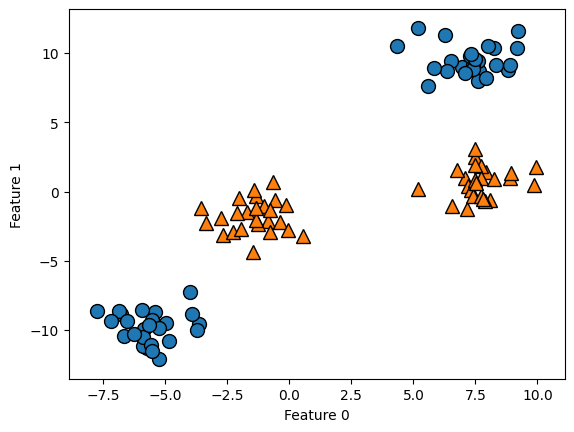

In [3]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

- Un `modelo lineal de clasificación sólo puede separar los puntos mediante una línea`, por lo tanto, no podrá hacer un buen trabajo en este conjunto de datos

In [4]:
from sklearn.svm import LinearSVC

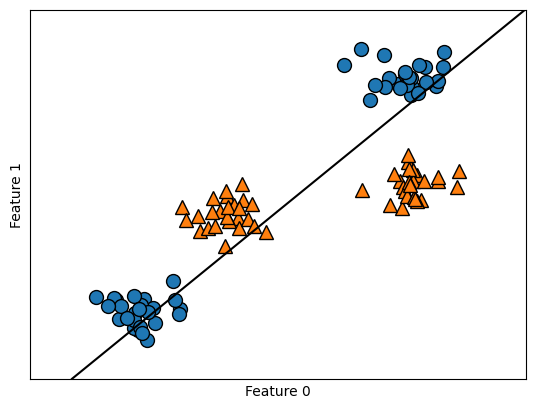

In [5]:
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

- Ahora vamos a `ampliar el conjunto de características de entrada, digamos que añadiendo también feature1 ** 2`, el cuadrado de la segunda característica, como una nueva característica. En lugar de representar cada punto de datos como un punto bidimensional, (`feature0`, `feature1`), ahora lo representamos como un punto tridimensional, (`feature0`, `feature1`, `feature1 ** 2`). Esta nueva representación se ilustra en el siguiente grafico de dispersión tridimensional

In [6]:
X_new = np.hstack([X, X[:, 1:] ** 2])

- Nótese que al nuevo array `X_new se le agregó una tercera columna` utilizando la segunda columna de `X`, `X[:, 1:]` 

In [7]:
X_new[:5]

array([[-1.72161036, -1.48033142,  2.19138111],
       [-3.6573384 , -9.5482383 , 91.16885455],
       [ 7.0778163 ,  0.99508772,  0.99019957],
       [-1.36579859, -0.3148625 ,  0.09913839],
       [-2.66521206, -3.12591651,  9.77135405]])

In [8]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

- `Visualizamos los datos en 3D` y trazamos primero todos los puntos con `y == 0`, luego todos con `y == 1`. Si está interesado en conocer mas sobre los argumentos que puede utilizar en la función `scatter` (ver [matplotlib.pyplot.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html))

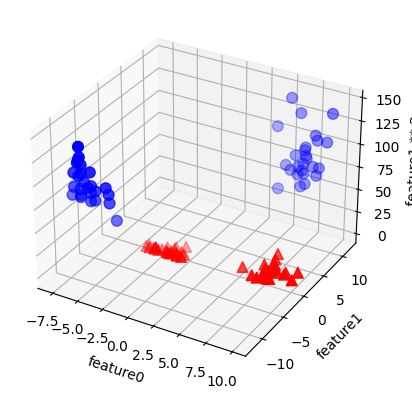

In [9]:
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26) #elev, azim: vertical and horizontal angle respectivly

ax = figure.add_subplot(projection='3d')
mask = y == 0 # booleano para etiquetado
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60) # s=60: points size; cmap=mglearn.cm2:color palette  
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2");

- En esta nueva representación de los datos, `ahora sí es posible separar las dos clases mediante un modelo lineal, un plano en tres dimensiones`. Podemos confirmarlo `ajustando un modelo lineal a los datos aumentados`

In [10]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

- Puede imprimir los coeficientes e intercepto (`coef, intercept`) del plano de la forma $c_{0}x+c_{1}y+c_{2}z+\text{intercept}$, que separa las dos clases. `Nótese que en este caso se está realizando un mapeo de características a un espacio de Hilbert, de mayor dimensión`, donde se linealiza nuestro problema de clasificación.
- Aquí `rstride, cstride` son utilizados para realizar divisiones uniformes en el plano `XY`, `elev` y `azim` son ángulos de rotación en grados que giran la imagen en `XY` y `Z` respectivamente, . Para mas información acerca de como usar `plot_surface` (ver [3D surface (colormap)](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html)). Es `tarea del estudiante profundizar en el uso de cada parámetro`.

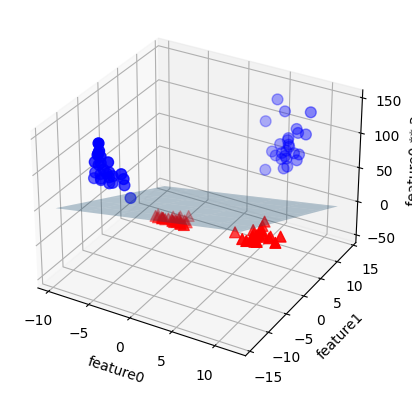

In [11]:
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)

ax = figure.add_subplot(projection='3d')
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2] #ecuación del plano

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3) #rstride/cstride: control row/column stride
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2");

- Como función de las características originales, el modelo `SVM lineal ya no es lineal`. No es una línea, sino `más bien una elipse`, como se puede ver en el gráfico creado aquí. Para dibujar la función de decisión utilizamos la clase `decision_function` de `LinearSVC()`.

- La función `ravel(), devuelve un array 1-D que contiene los elementos de la entrada`. Se hace una copia sólo si se necesita. Para conocer más métodos que pueden ser utilizados a partir de la clase `SVC` (ver [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)). Aquí `levels indica niveles específicos en los que las curvas de nivel serán dibujadas`, los valores deben estar en orden creciente. Para mas información acerca de dibujos de contorno (ver [matplotlib.pyplot.contourf](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html)).

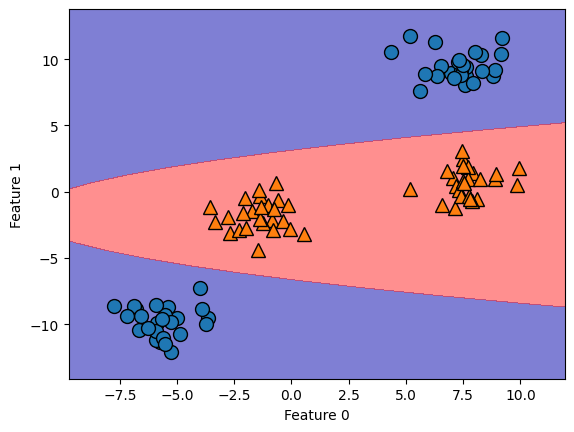

In [12]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

## El Kernel Trick

- Durante el entrenamiento, `SVM aprende cuan importante son cada uno de los puntos de datos de entrenamiento para representar el límite de decisión entre las dos clases`. Recuerde que, `sólo un subconjunto de los puntos de entrenamiento es importante para definir la frontera de decisión`, los que se encuentran en la frontera entre las clases (`vectores de soporte`).

- Para hacer una predicción de un nuevo punto, se mide la distancia a cada uno de los vectores de soporte. `Se toma una decisión de clasificación basada en las distancias a los vectores de soporte y en la importancia de los vectores de soporte, aprendida durante el entrenamiento` (almacenado en el atributo `dual_coef_` de `SVC`). La distancia entre los puntos de datos se mide, por ejemplo, mediante el `kernel Gaussiano`:

$$
k_{\text{rbf}}=\exp(\gamma\|x_{1}-x_{2}\|^2).
$$

- Aquí, $x_{1}$ y $x_{2}$ son puntos de datos, $\|x_{1} - x_{2}\|$ denota la distancia euclidiana, y $\gamma$ es un parámetro que controla el ancho del kernel gaussiano. $\gamma$`=gamma` define un `factor de escala general para la noción de distancia entre dos puntos de la SVM`; esto, a su vez, define `cómo un vector de apoyo da forma al límite de decisión en su vecindad cercana`. La siguiente figura muestra el resultado del entrenamiento de una máquina de vectores de soporte en un conjunto de datos bidimensional de dos clases. `El límite de decisión se muestra en negro, y los vectores de soporte son puntos más grandes con el contorno ancho`. El siguiente código crea este gráfico entrenando una `SVM` en el conjunto de datos `forge`

In [13]:
import imp
from sklearn.svm import SVC
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import numpy as np
cancer = load_breast_cancer()

In [14]:
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)

In [15]:
print("X.shape =", X.shape, "; y.shape", y.shape)

X.shape = (26, 2) ; y.shape (26,)


- Dibujamos los vectores de soporte. `Las etiquetas de clase de los vectores soporte vienen dadas por el signo de los coeficientes duales` obtenidos en Python por medio de la función `dual_coef_`

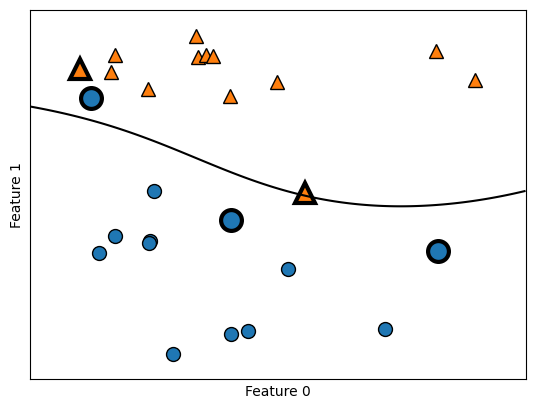

In [16]:
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

- En este caso, `SVM produce un límite muy suave y no lineal`. Aquí ajustamos dos parámetros: el parámetro `C` y el parámetro `gamma`, que ahora discutiremos en detalle. Puede `hacer uso de la validación cruzada y pipeline` estudiados en la sección de evaluación de modelos.

## Ajuste de los parámetros de SVM

- El `parámetro gamma` es el que se muestra en la fórmula dada en la sección anterior, que `controla la anchura del kernel Gaussiano`. Determina la `escala de lo que significa que los puntos estén próximos entre sí`. El parámetro `C es un parámetro de regularización, similar al utilizado en los modelos lineales`. Limita la importancia de cada punto (o más precisamente, su `dual_coef_`). Veamos qué ocurre cuando variamos estos parámetros:

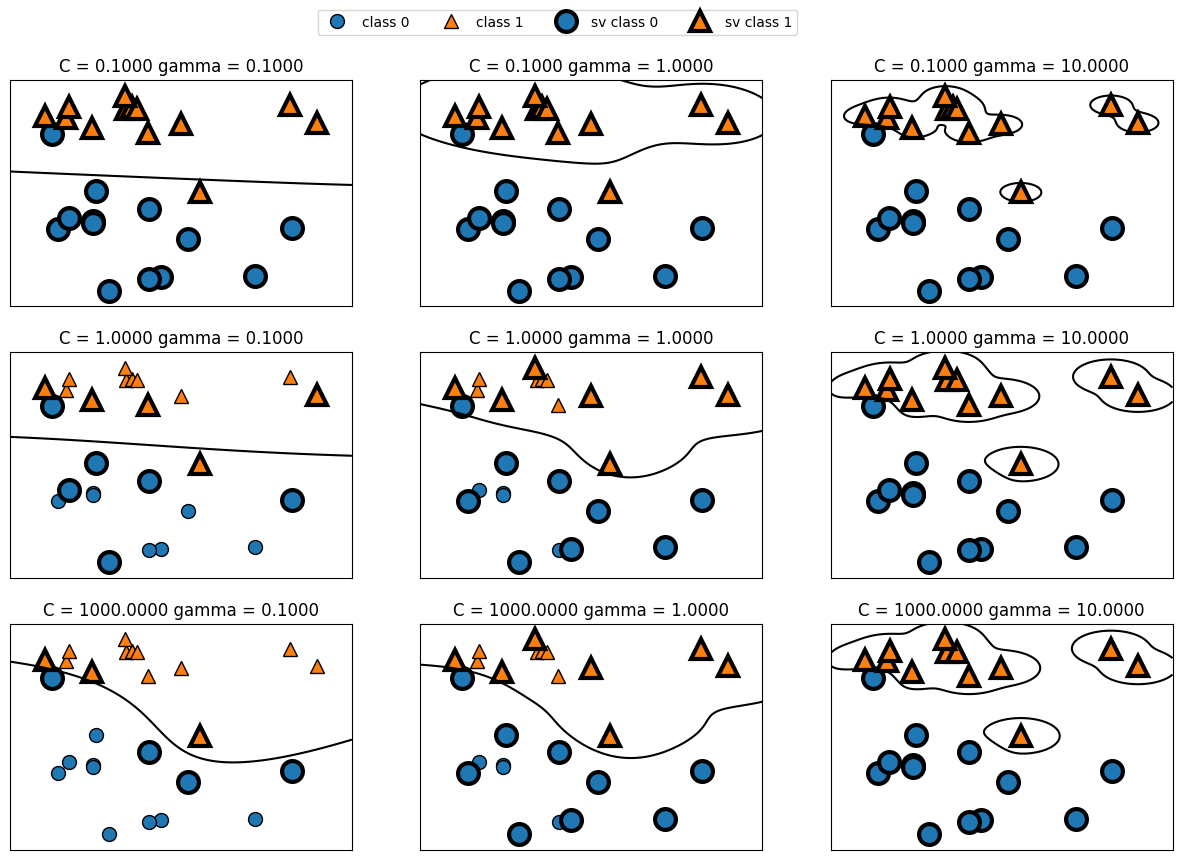

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol=4, loc=(.9, 1.2))

- De izquierda a derecha, aumentamos el valor del `parámetro gamma de 0.1 a 10`. Un `gamma pequeño significa un radio grande para el kernel gaussiano, lo que significa que muchos puntos se consideran cercanos`. Esto se refleja en unos `límites de decisión muy suaves a la izquierda, y límites que se centran más en puntos individuales más a la derecha`. Un valor bajo de `gamma` significa que el límite de decisión variará lentamente, lo que produce un modelo de baja complejidad, mientras que `un valor alto de gamma da lugar a un modelo más complejo`.

- De arriba a abajo, aumentamos el parámetro `C` de 0.1 a 1000. Al igual que con los modelos lineales, un valor de `C` pequeño `corresponde a un modelo muy restringido, en el que cada punto de datos sólo puede tener una influencia muy limitada`. Se puede ver que en la parte superior izquierda el límite de decisión parece casi lineal, y los puntos mal clasificados apenas influyen en la línea.
- `Aumentar C, como se muestra en la parte inferior derecha, permite que estos puntos tengan una influencia en el modelo y hace que el límite de decisión se doble para clasificarlos correctamente`. Apliquemos `SVM` de núcleo `RBF` al conjunto de datos **`breast cancer`**. Por defecto, `C=1` y `gamma=1/n_features`. Queda como tarea para el estudiante hiperparametrizar cada uno de estos parámetros por medio del uso de `GridSearchCV` y `Pipeline`.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


- Aunque las `SVM` suelen funcionar bastante bien, `son muy sensibles a los ajustes de los parámetros y al escalado de los datos`. En particular, requieren que `todas las características varíen en una escala similar`. Veamos los valores mínimos y máximos de cada característica, trazados en escala logarítmica

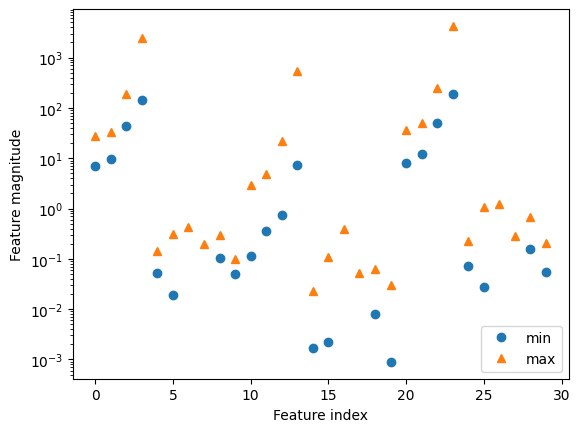

In [19]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

- A partir de este gráfico podemos determinar que `las características del conjunto de datos de cáncer de mama son de órdenes de magnitud completamente diferentes`. Esto puede ser un problema para otros modelos (como los modelos lineales), pero `tiene efectos devastadores para SVM con kernel`. Examinemos algunas formas de resolver este problema.

## Preprocesamiento de datos para SVM

- Una forma de resolver este problema es `reescalar cada característica para que todas estén aproximadamente en la misma escala`. Un método común de reescalado para `SVMs` con kernel consiste en `escalar los datos de manera que todas las características estén entre 0 y 1`. Veremos cómo hacer esto usando el método de preprocesamiento `MinMaxScaler`, $X_{\textsf{scaled}}=(X-X_{\textsf{min}})/(X_{\textsf{max}}-X_{\textsf{min}})$. Con el fin de comprender su funcionamiento, vamos a `implementar el preprocesamiento "de forma manual"`

- Calculamos el valor `mínimo por característica en el conjunto de entrenamiento`. Dado que `X_train` contiene 30 columnas de características, el resultado va a ser un array de dimensión 30. Para obtenerlo usamos `min(axis=0)`, para que el mínimo sea buscado sobre las filas de cada columna.

In [20]:
X_train.shape

(426, 30)

In [21]:
min_on_training = X_train.min(axis=0)
min_on_training.shape

(30,)

- Calculamos el `vector de rangos para cada característica (max - min)` en el conjunto de entrenamiento. El `máximo sobre cada columna es calculado usando la función max(axis=0)`.

In [22]:
range_on_training = (X_train - min_on_training).max(axis=0)
range_on_training.shape

(30,)

- `Restamos con el mínimo, cada una de las características en X_train` y después dividimos por el `rango para cada característica` resultante

In [23]:
X_train_scaled = (X_train - min_on_training) / range_on_training

In [24]:
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [25]:
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


- `Utilizamos la misma transformación en el conjunto de prueba`, utilizando el mínimo y el rango del conjunto de entrenamiento

In [26]:
X_test_scaled = (X_test - min_on_training) / range_on_training

- Utilizando ahora los `datos transformados, entrenamos el modelo SVC()` y verificamos valores de `accuracy`

In [27]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.972


- Escalar los datos supuso una gran diferencia. Ahora estamos en un régimen de `overfitting donde el rendimiento del conjunto de entrenamiento es ligeramente mayor que el de prueba`, pero menos cercano al 100% de `accuracy`. A partir de aquí, podemos intentar disminuir `C` o `gamma` para ajustar un modelo regularizado. Por ejemplo:

In [28]:
svc_C01 = SVC(C=0.1)
svc_C01.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(svc_C01.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc_C01.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.958


- Nótese que sucede cuando seguimos disminuyendo el valor de $C$

In [29]:
svc_C001 = SVC(C=0.01)
svc_C001.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(svc_C001.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc_C001.score(X_test_scaled, y_test)))

Accuracy on training set: 0.643
Accuracy on test set: 0.636


- Si usamos un parámetro de regularización `C demasiado extremos, podemos caer nuevamente en un mayor overfitting`, o en un modelo demasiado simple, que entrega valores de `accuracy` bastantes bajos para los datos de entrenamiento y prueba, esto es, `el modelo no será capaz de generalizarse correctamente, underfitting`.

In [30]:
svc_C100 = SVC(C=100)
svc_C100.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(svc_C100.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc_C100.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


```{admonition} Puntos fuertes, puntos débiles y parámetros

- Las máquinas de vectores de soporte kernelizadas son modelos potentes y funcionan bien en una variedad de conjuntos de datos. `Las SVM permiten establecer límites de decisión complejos, incluso si los datos sólo tienen  unas pocas características`. Funcionan bien con datos de baja y alta dimensión (es decir, pocas y muchas características), pero no escalan muy bien con el número de muestras. Ejecutar SVM con datos de hasta 10.000 muestras puede funcionar bien, pero `trabajar con conjuntos de datos de 100.000 o más puede ser un reto en términos de tiempo de ejecución y uso de memoria`.

- Otra desventaja de SVM es que `requieren un cuidadoso preprocesamiento de los datos y el ajuste de los parámetros`. Por eso, hoy en día, algunos investigadores utilizan modelos basados en árboles, como los bosques aleatorios o el gradient boosting (que requieren poco o ningún preprocesamiento) en muchas aplicaciones. Además, los modelos `SVM` son difíciles de inspeccionar, `puede ser difícil entender por qué se ha hecho una predicción concreta, y puede ser difícil explicar el modelo a un inexperto`. Aun así, puede valer la pena probar las `SVM`, sobre todo si todas las características representan medidas en unidades similares (por ejemplo, todas son intensidades de píxeles) y están en escalas similares.

- Los `parámetros importantes en las SVM con kernel son el parámetro de regularización C, la elección del kernel, y los parámetros específicos del kernel`. Aunque principalmente nos centramos en el núcleo `RBF`, hay otras opciones disponibles en `scikit-learn`. El núcleo `RBF` tiene sólo un parámetro,` gamma`, que es la inversa de la anchura del kernel de Gaus. `gamma` y `C` controlan la complejidad del modelo, `con valores grandes en cualquiera de ellos obtenemos un modelo más complejo`. Por lo tanto, los buenos ajustes para los dos parámetros suelen estar fuertemente correlacionados, y `C` y `gamma` deben ajustarse juntos.
```